# Analyzing 48-Hour Dataset

#### This notebook is our first full analysis of a sizable dataset (48 hours). The test took place from 13:33 local time on 07-13 until 13:41 local time on 07-15. The sensor was placed on a downstairs kitchen counter, a kitchen that was not used during the duration of the test.

## Table of Contents:
* [Import and Organize Data](#Header-1)
* [Plot Certain Hourly PM Averages](#Header-2)
* [Plot Certain Daily PM Averages](#Header-3)
* [Plot Certain Rolling PM Averages](#Header-4)
* [Plot PM Averages with Threshold](#Header-5)
* [Sample AQI Calculation](#Header-6)
* [Observations](#Header-7)

In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import os

mp.rcParams['figure.dpi'] = 300

## Import and Organize Data <a class="anchor" id="Header-1"></a>

Data is imported from the directory on the computer used to store the data, and a dataframe is created. The datetime information is then converted from seconds from the epoch into New York local time with day, month, and year.

In [2]:
directory = os.listdir(r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-13_to_07-15')
j = 0
data = [''] * len(directory)
for i in directory:
    path = r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-13_to_07-15' + "\\" + i
    data[j] = pd.read_csv(path)
    j = j + 1

table = pd.concat([data[0], data[1]], ignore_index=True)
for i in range(2,len(data)):
    table = pd.concat([table,data[i]],ignore_index=True)
    
table["datetime"] = pd.to_datetime(table["datetime"],unit='s',origin='unix')
table["datetime"] = table["datetime"].dt.tz_localize('utc').dt.tz_convert('America/New_York')

## Plot Certain Hourly PM Averages <a class="anchor" id="Header-2"></a>

This section plots the hourly PM averages during the testing period. As this occured over several days, the averages are of that hour across the days the test took place.

### Plot Hourly PM2.5

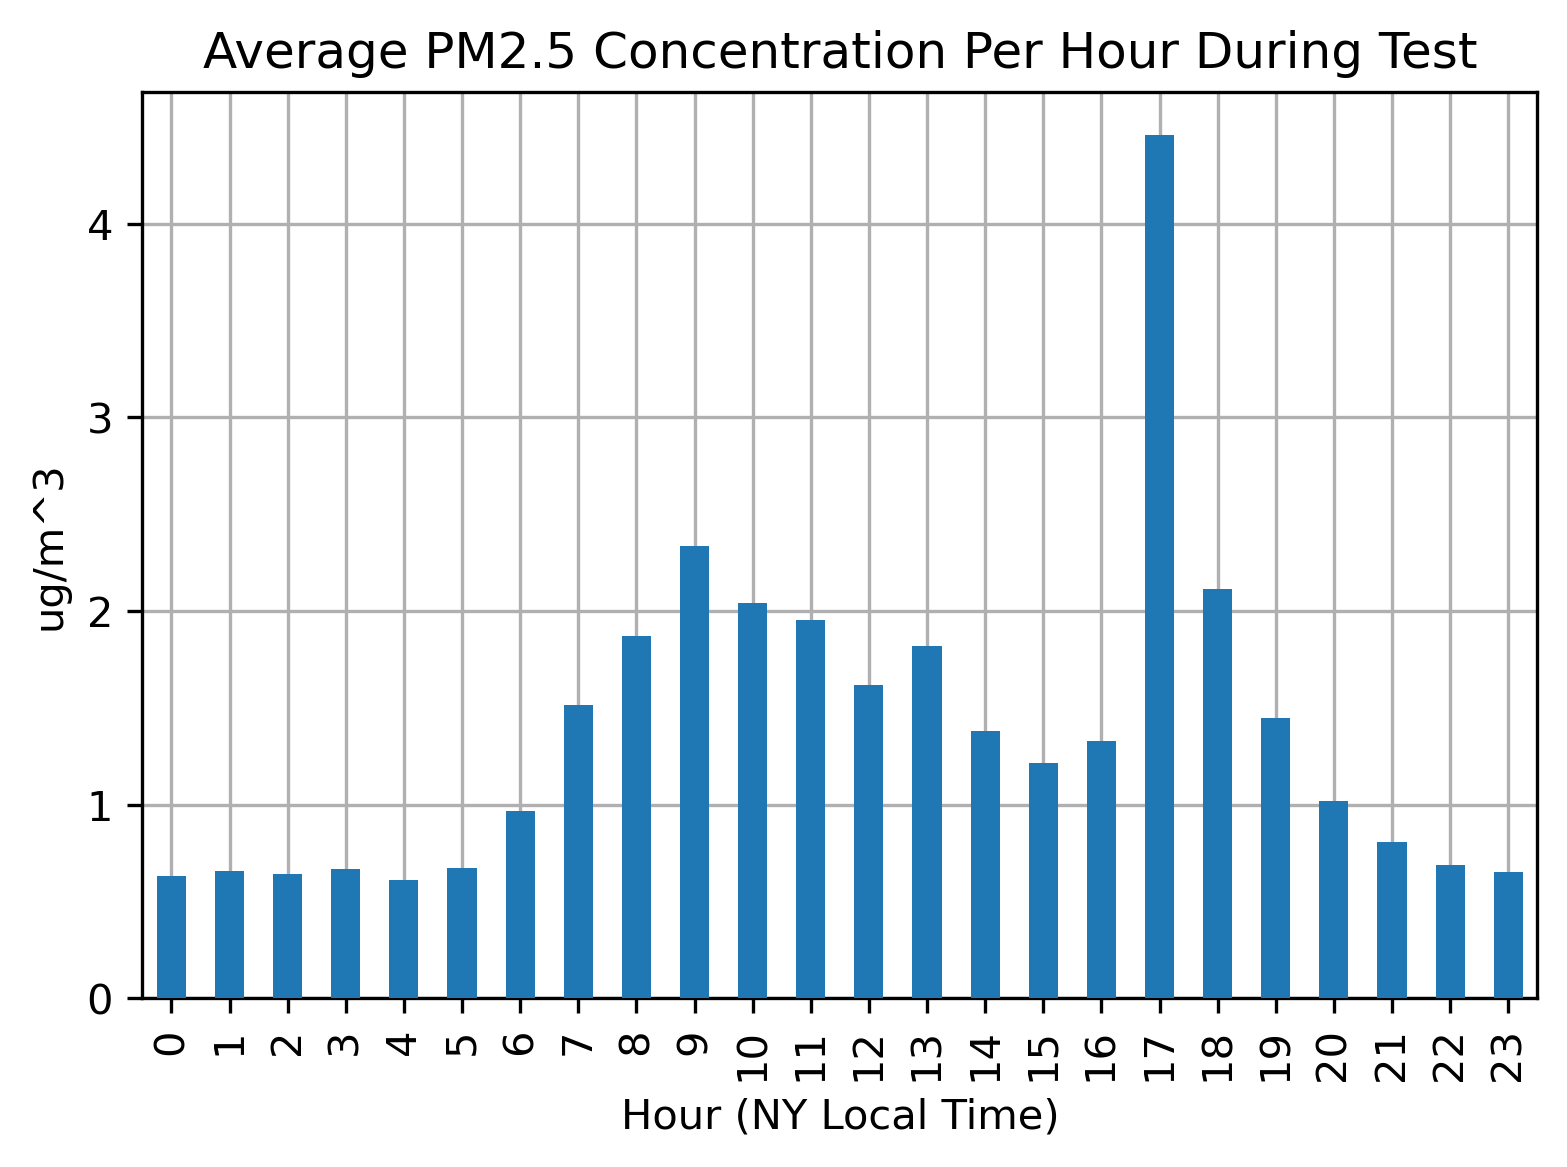

In [3]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM2.5 Concentration Per Hour During Test")
plt.grid()

### Plot Hourly PM10

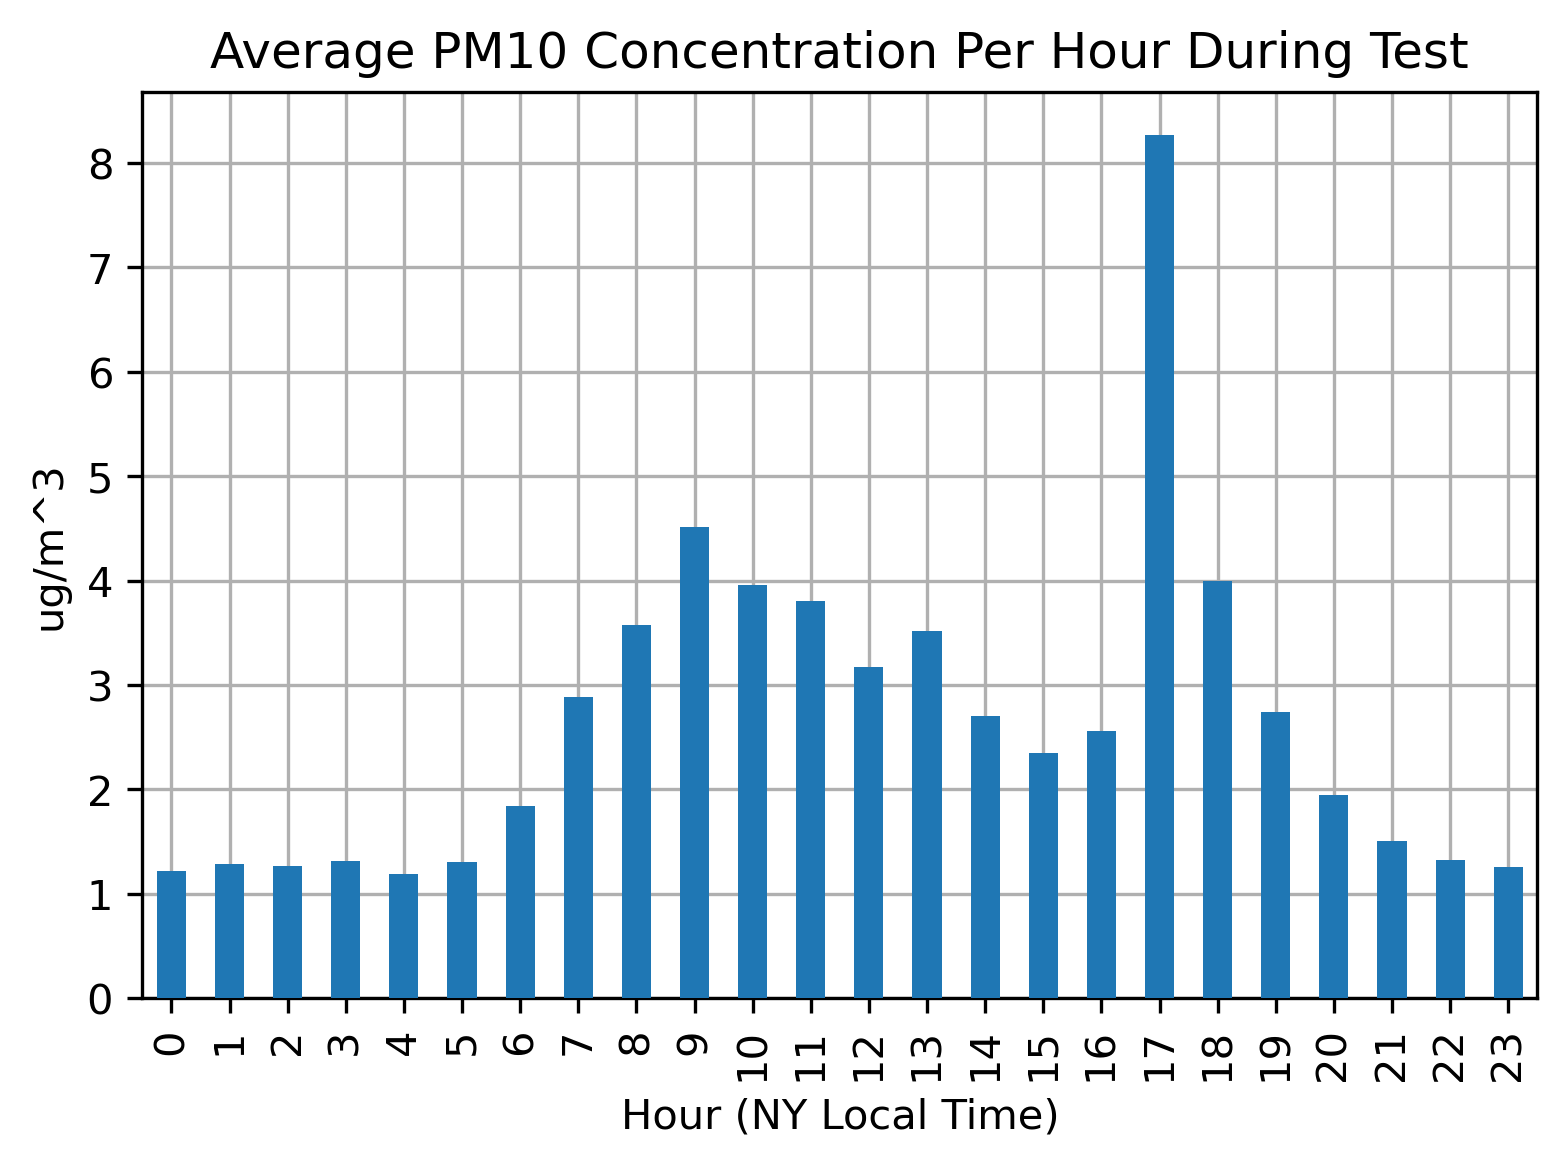

In [4]:
table.groupby(table["datetime"].dt.hour)["PM10"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM10 Concentration Per Hour During Test")
plt.grid()

### Plot Hourly PM0.1

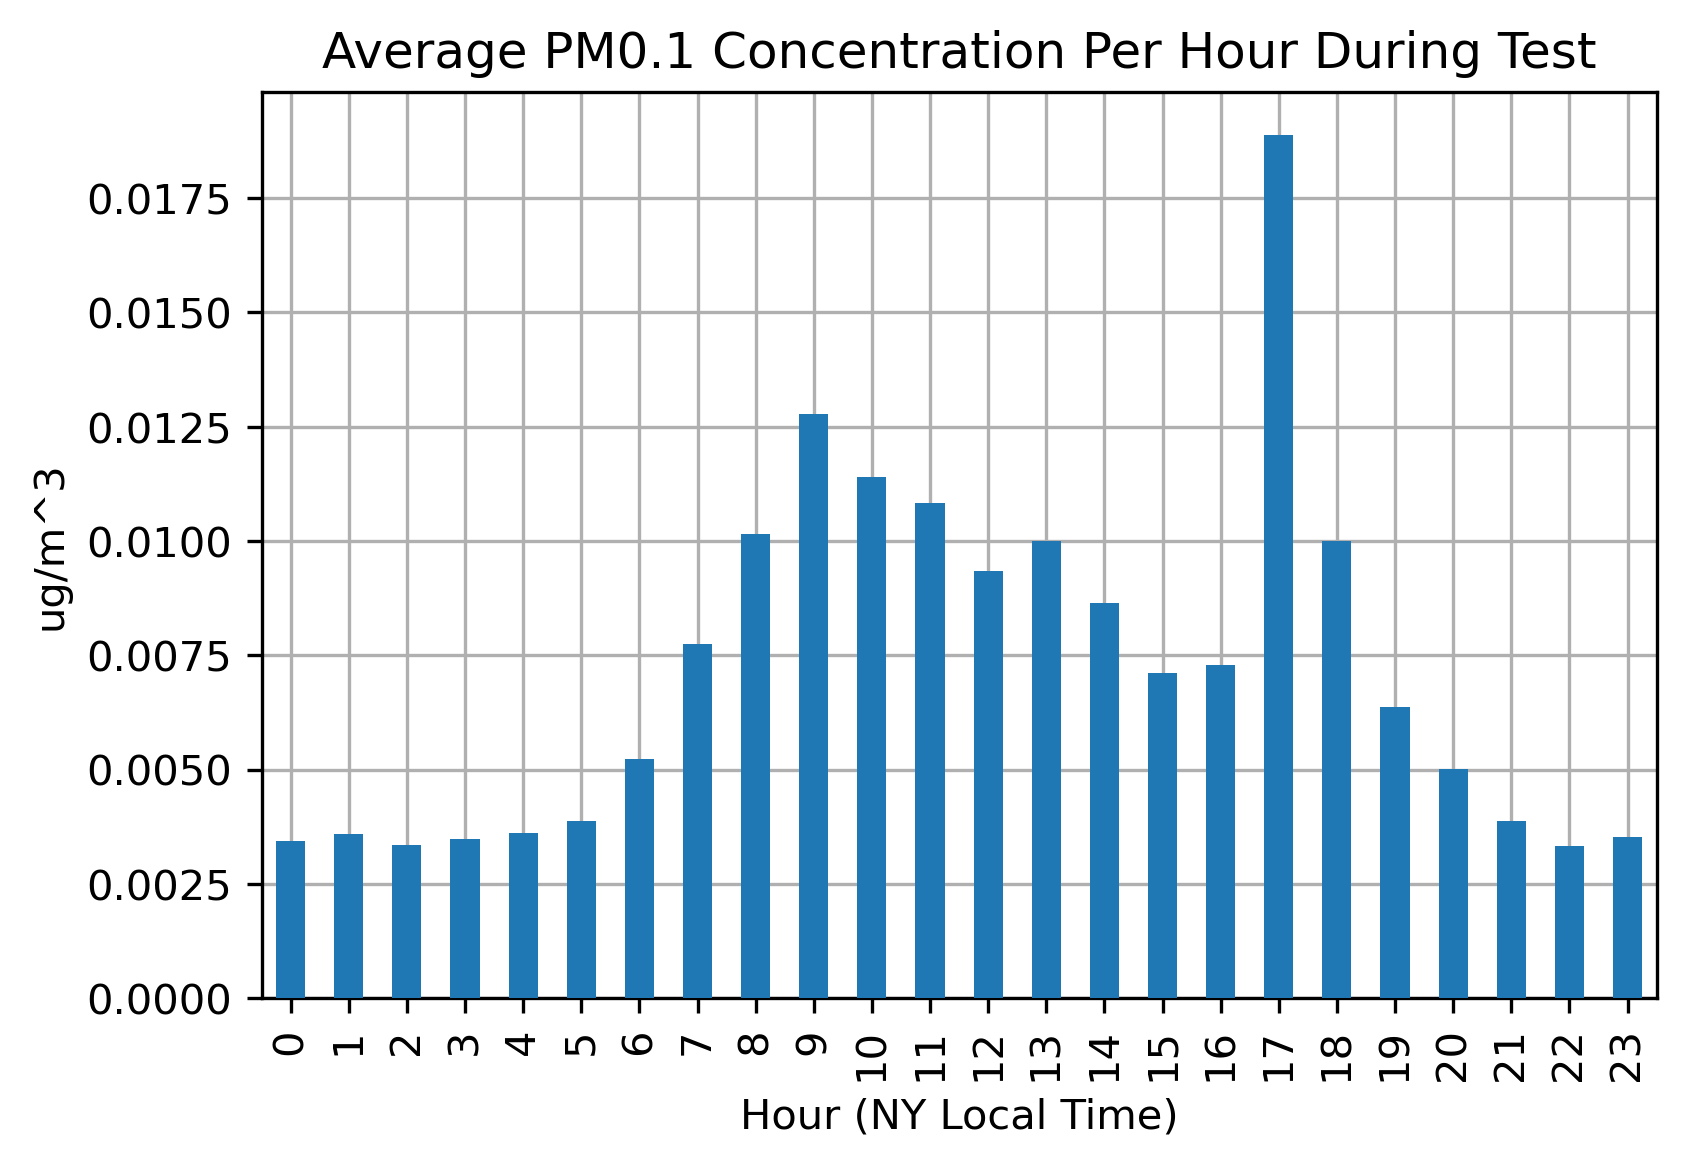

In [5]:
table.groupby(table["datetime"].dt.hour)["PM0.1"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM0.1 Concentration Per Hour During Test")
plt.grid()

## Plot Certain Daily PM Averages <a class="anchor" id="Header-3"></a>

These plots contain the average concentration during that day of the test. It should be noted that as the test covers a 48-hour period, only July-14's average reflects all 24 hours of the day. The test took place from 13:33 local time on 07-13 until 13:41 local time on 07-15.

### Plot Daily PM2.5

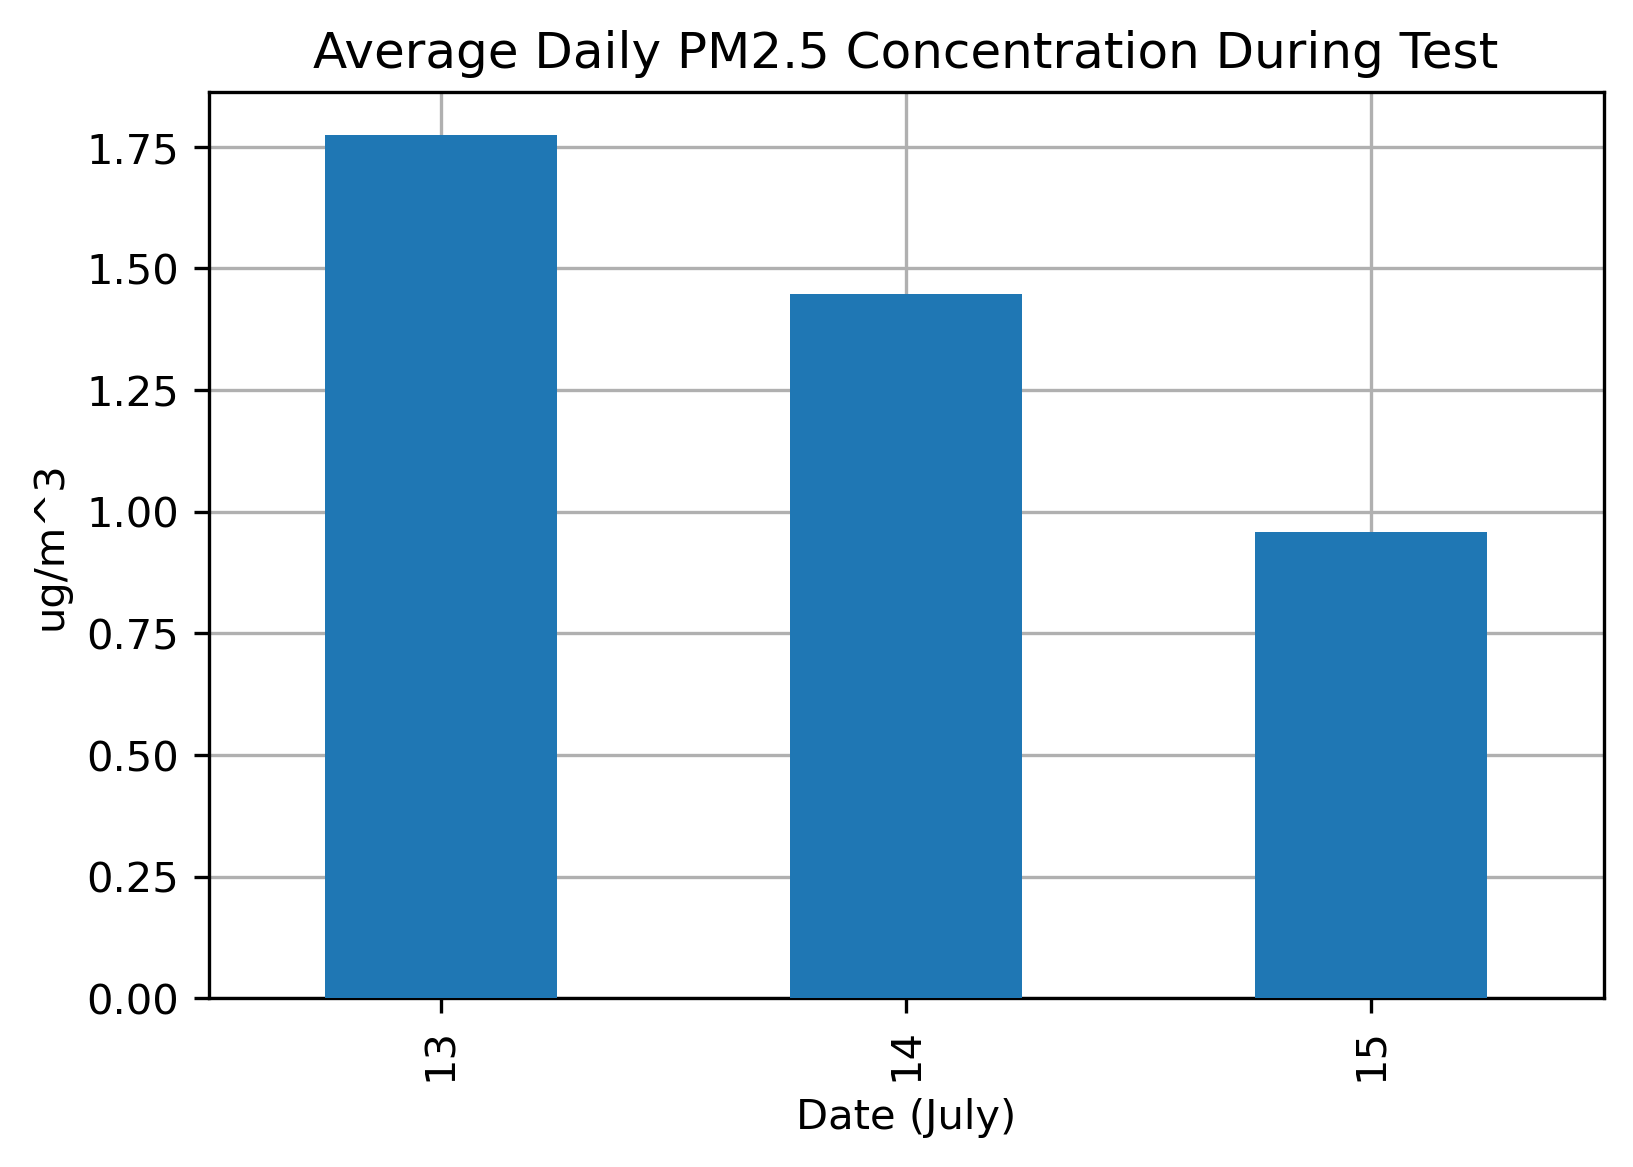

In [6]:
table.groupby(table["datetime"].dt.day)["PM2.5"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM2.5 Concentration During Test")
plt.grid()

### Plot Daily PM10

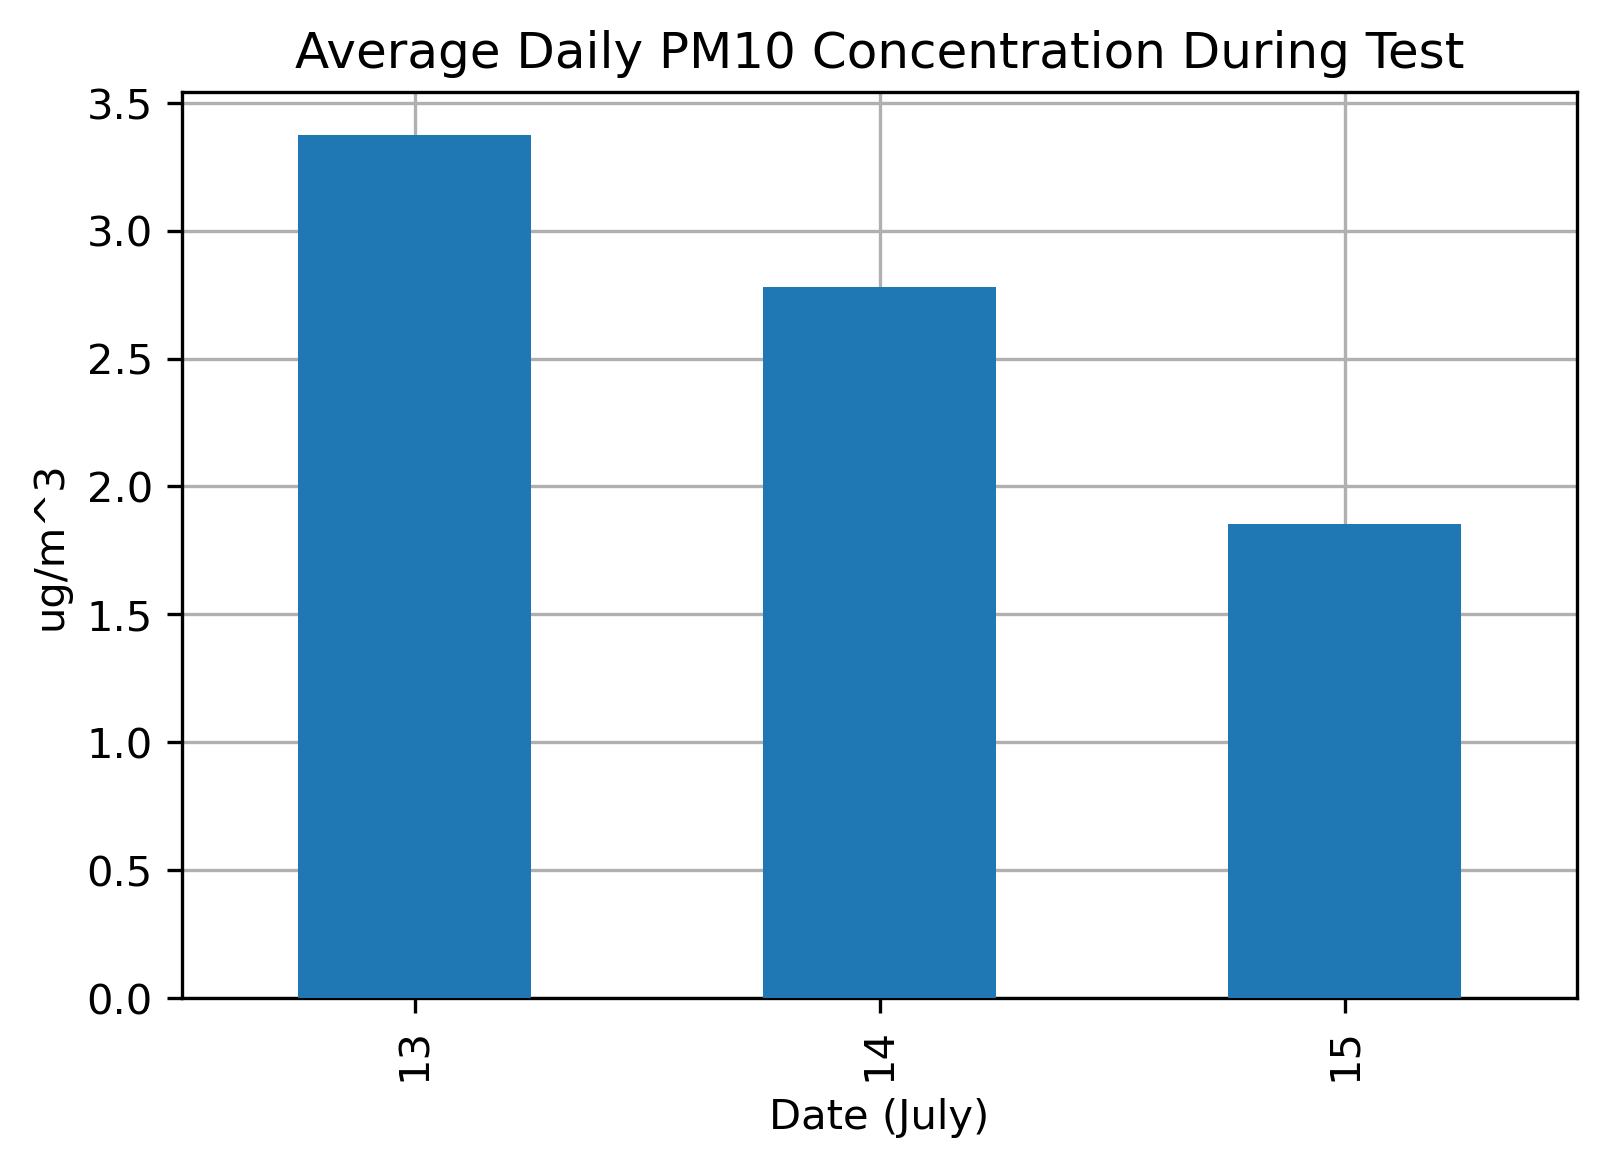

In [7]:
table.groupby(table["datetime"].dt.day)["PM10"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM10 Concentration During Test")
plt.grid()

### Plot Daily PM0.1

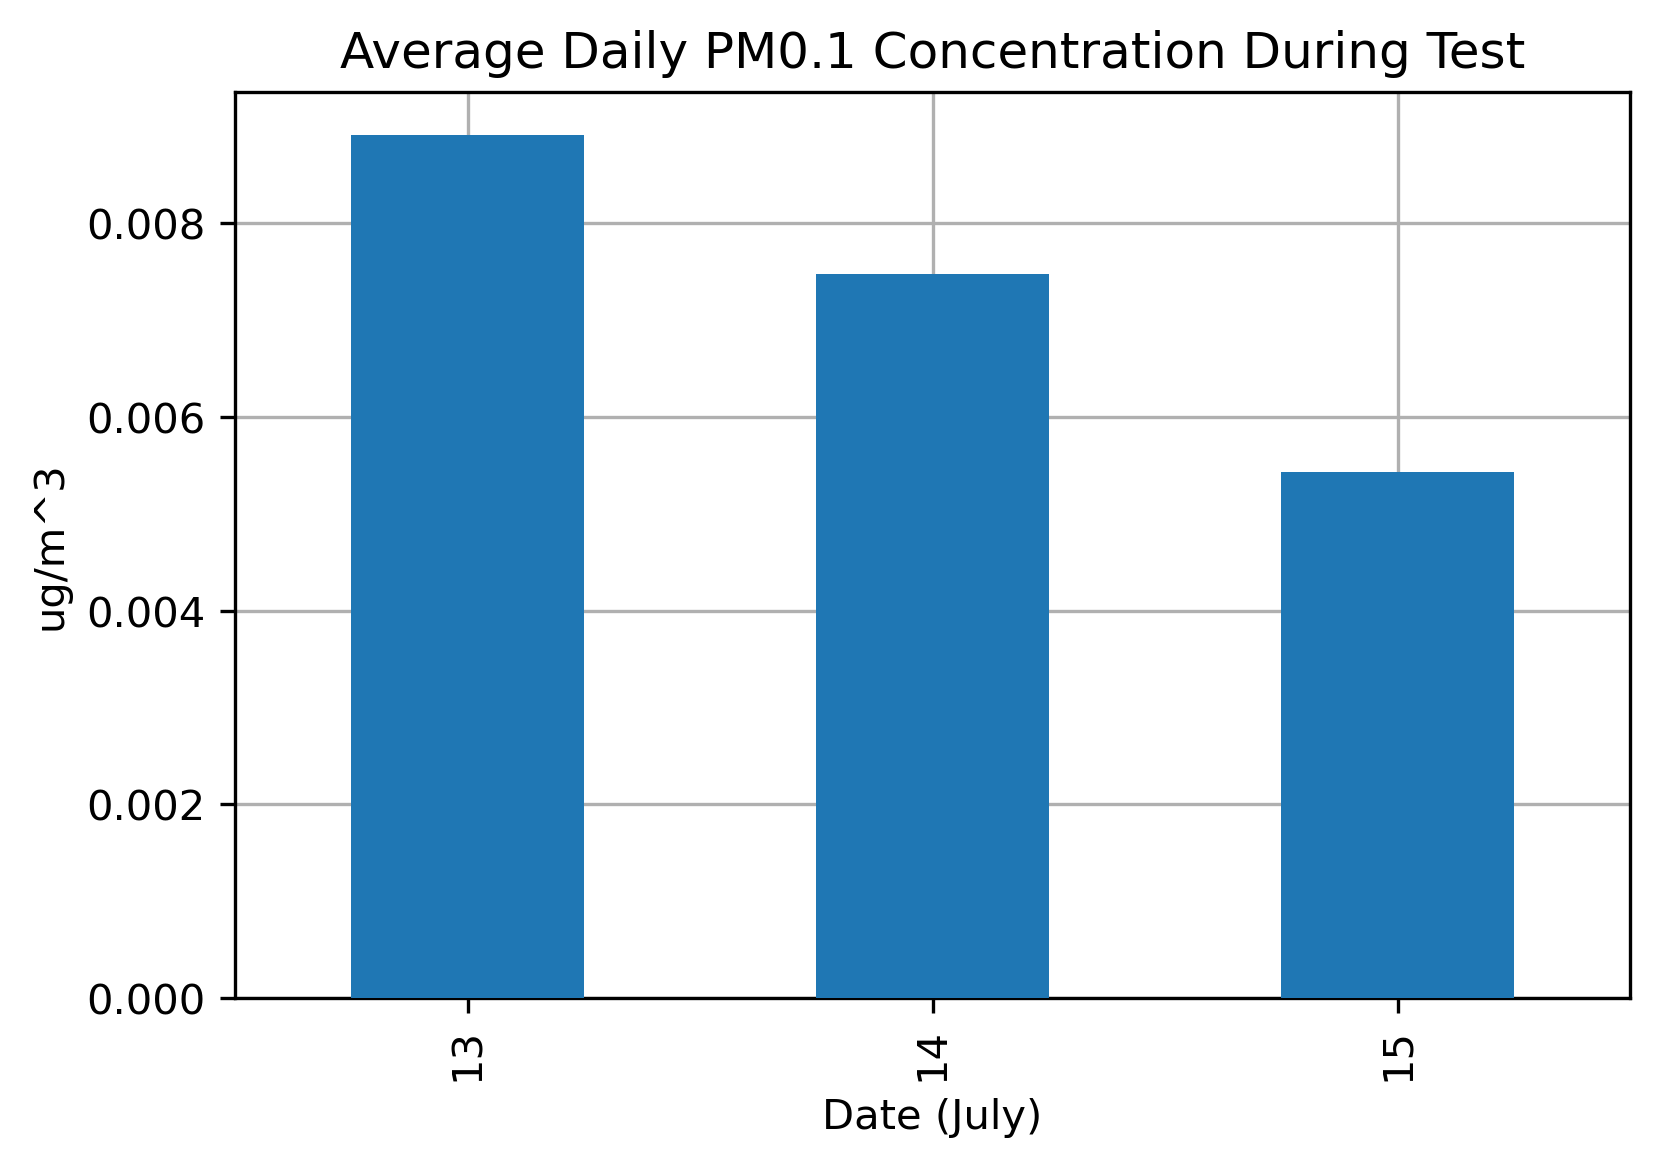

In [8]:
table.groupby(table["datetime"].dt.day)["PM0.1"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.title("Average Daily PM0.1 Concentration During Test")
plt.grid()

It should be reiterated that the only day present that encompases a full 48 hours is 07-14. 07-13 only includes afternoon-night (13:33 onward), whereas 07-15 only includes morning-early afternoon (00:00 until 13:41).

## Plot Certain Rolling PM Averages <a class="anchor" id="Header-4"></a>

This section creates hourly rolling averages of PM values during the test period.

### Construct Data Frames:

In [9]:
PM25Struct = pd.DataFrame(table)[['datetime','PM2.5']]
PM25Struct['Rolling Hourly Average'] = PM25Struct.rolling(3600).mean()
PM10Struct = pd.DataFrame(table)[['datetime','PM10']]
PM10Struct['Rolling Hourly Average'] = PM10Struct.rolling(3600).mean()
PM01Struct = pd.DataFrame(table)[['datetime','PM0.1']]
PM01Struct['Rolling Hourly Average'] = PM01Struct.rolling(3600).mean()

### PM2.5 Hourly Rolling Average

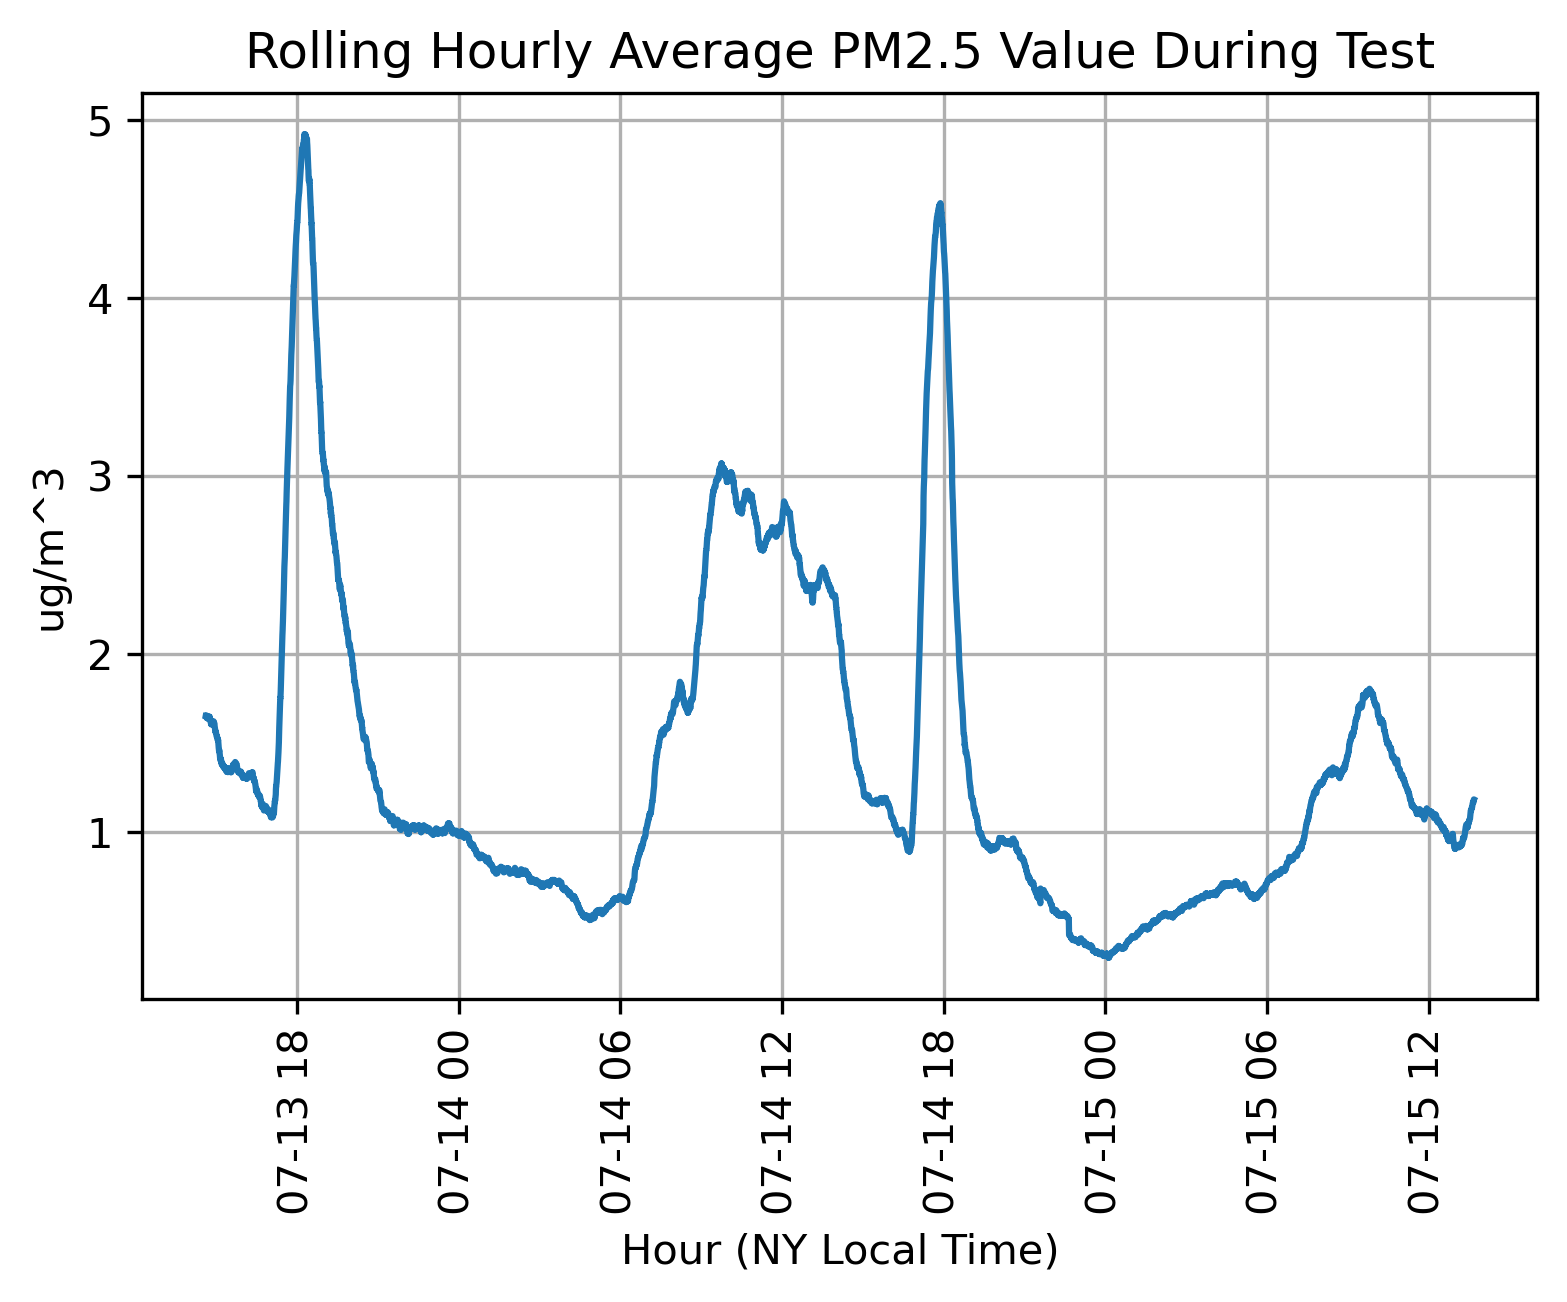

In [10]:
plt.plot(PM25Struct['datetime'],PM25Struct['Rolling Hourly Average'], zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.xticks(rotation='vertical')
plt.title("Rolling Hourly Average PM2.5 Value During Test")
plt.grid()

### PM10 Hourly Rolling Average

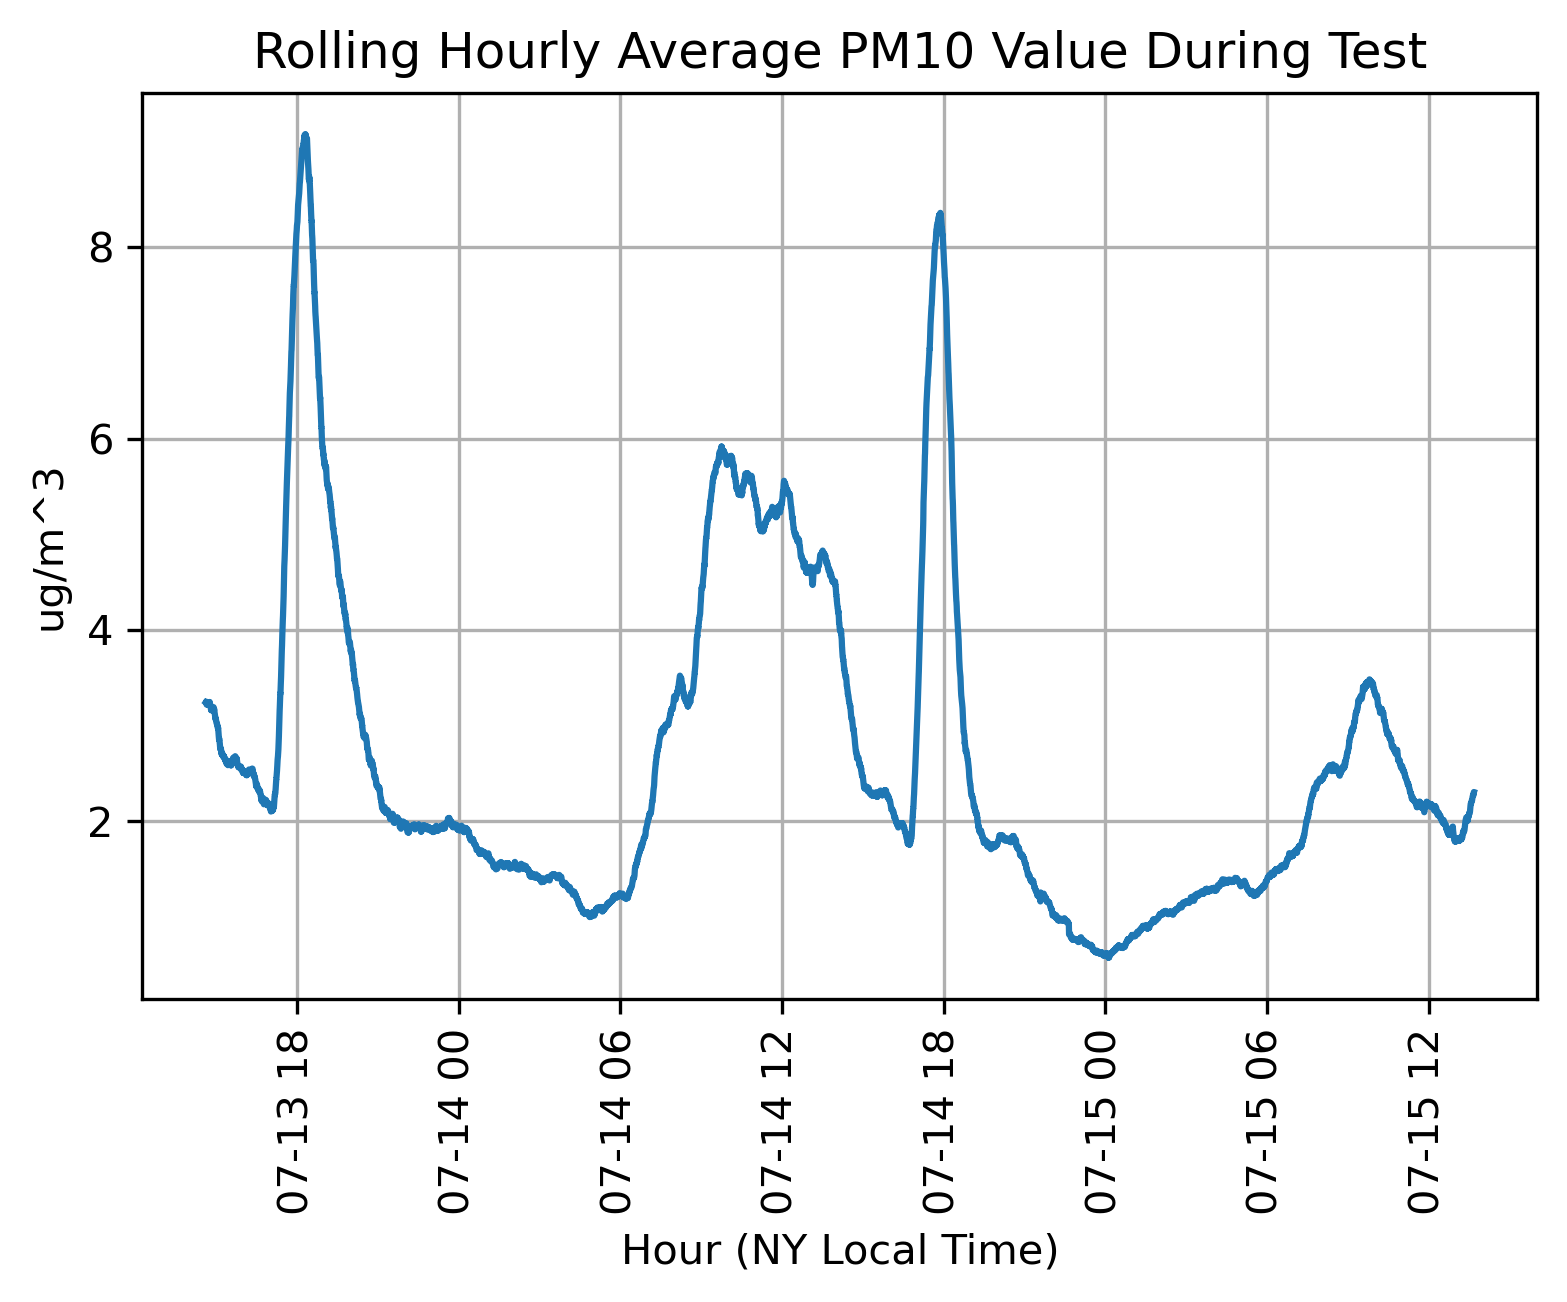

In [11]:
plt.plot(PM10Struct['datetime'],PM10Struct['Rolling Hourly Average'], zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.xticks(rotation='vertical')
plt.title("Rolling Hourly Average PM10 Value During Test")
plt.grid()

### PM0.1 Hourly Rolling Average

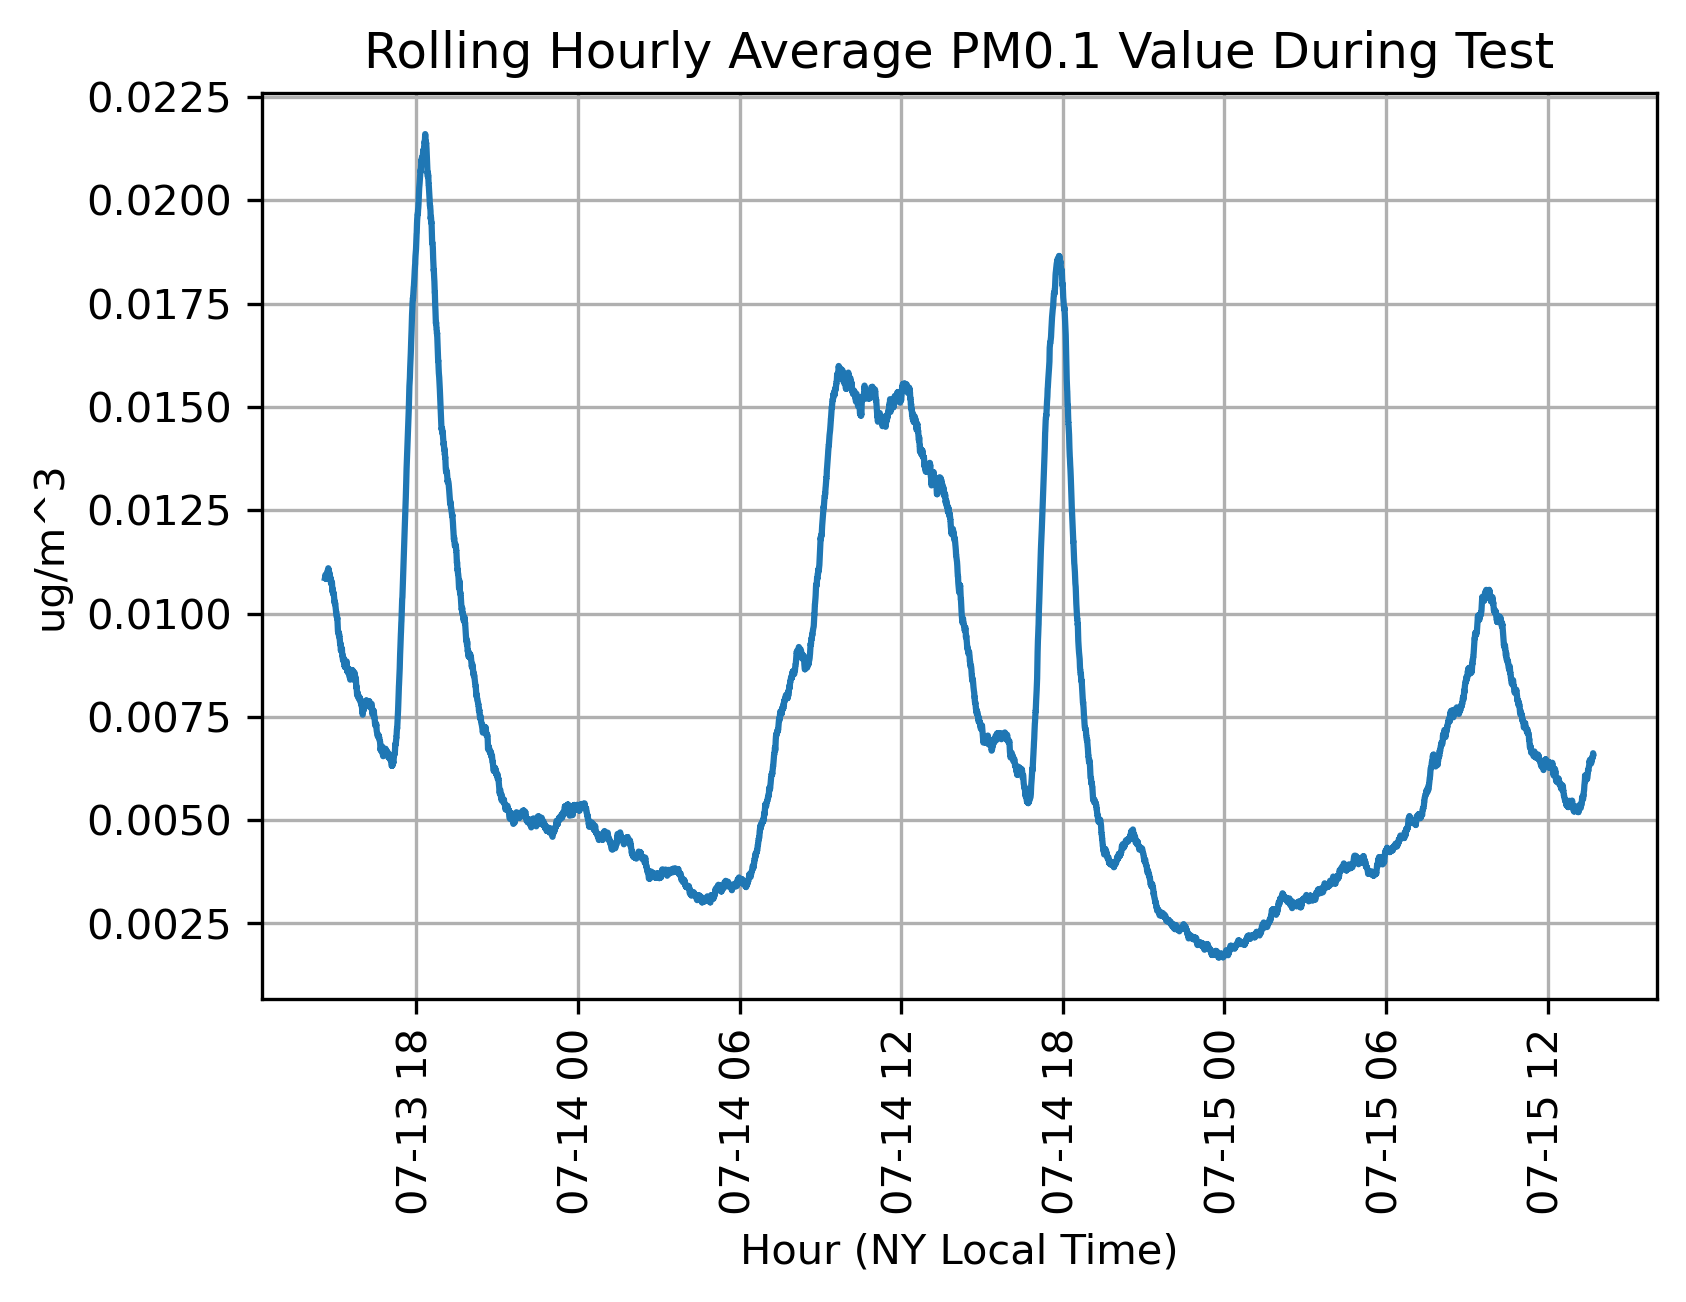

In [12]:
plt.plot(PM01Struct['datetime'],PM01Struct['Rolling Hourly Average'], zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.xticks(rotation='vertical')
plt.title("Rolling Hourly Average PM0.1 Value During Test")
plt.grid()

### Rolling Average Observations

We can observe that these trends follow the broad trends of the hourly averages, particularly the large increases at 17:00 and low numbers in the early morning hours.

## Plot PM Averages with Threshold <a class="anchor" id="Header-5"></a>

This section repeats earlier PM concentration bar graphs, with the addition of threshold lines based on AQI level limits.

### Hourly PM2.5 with Threshold

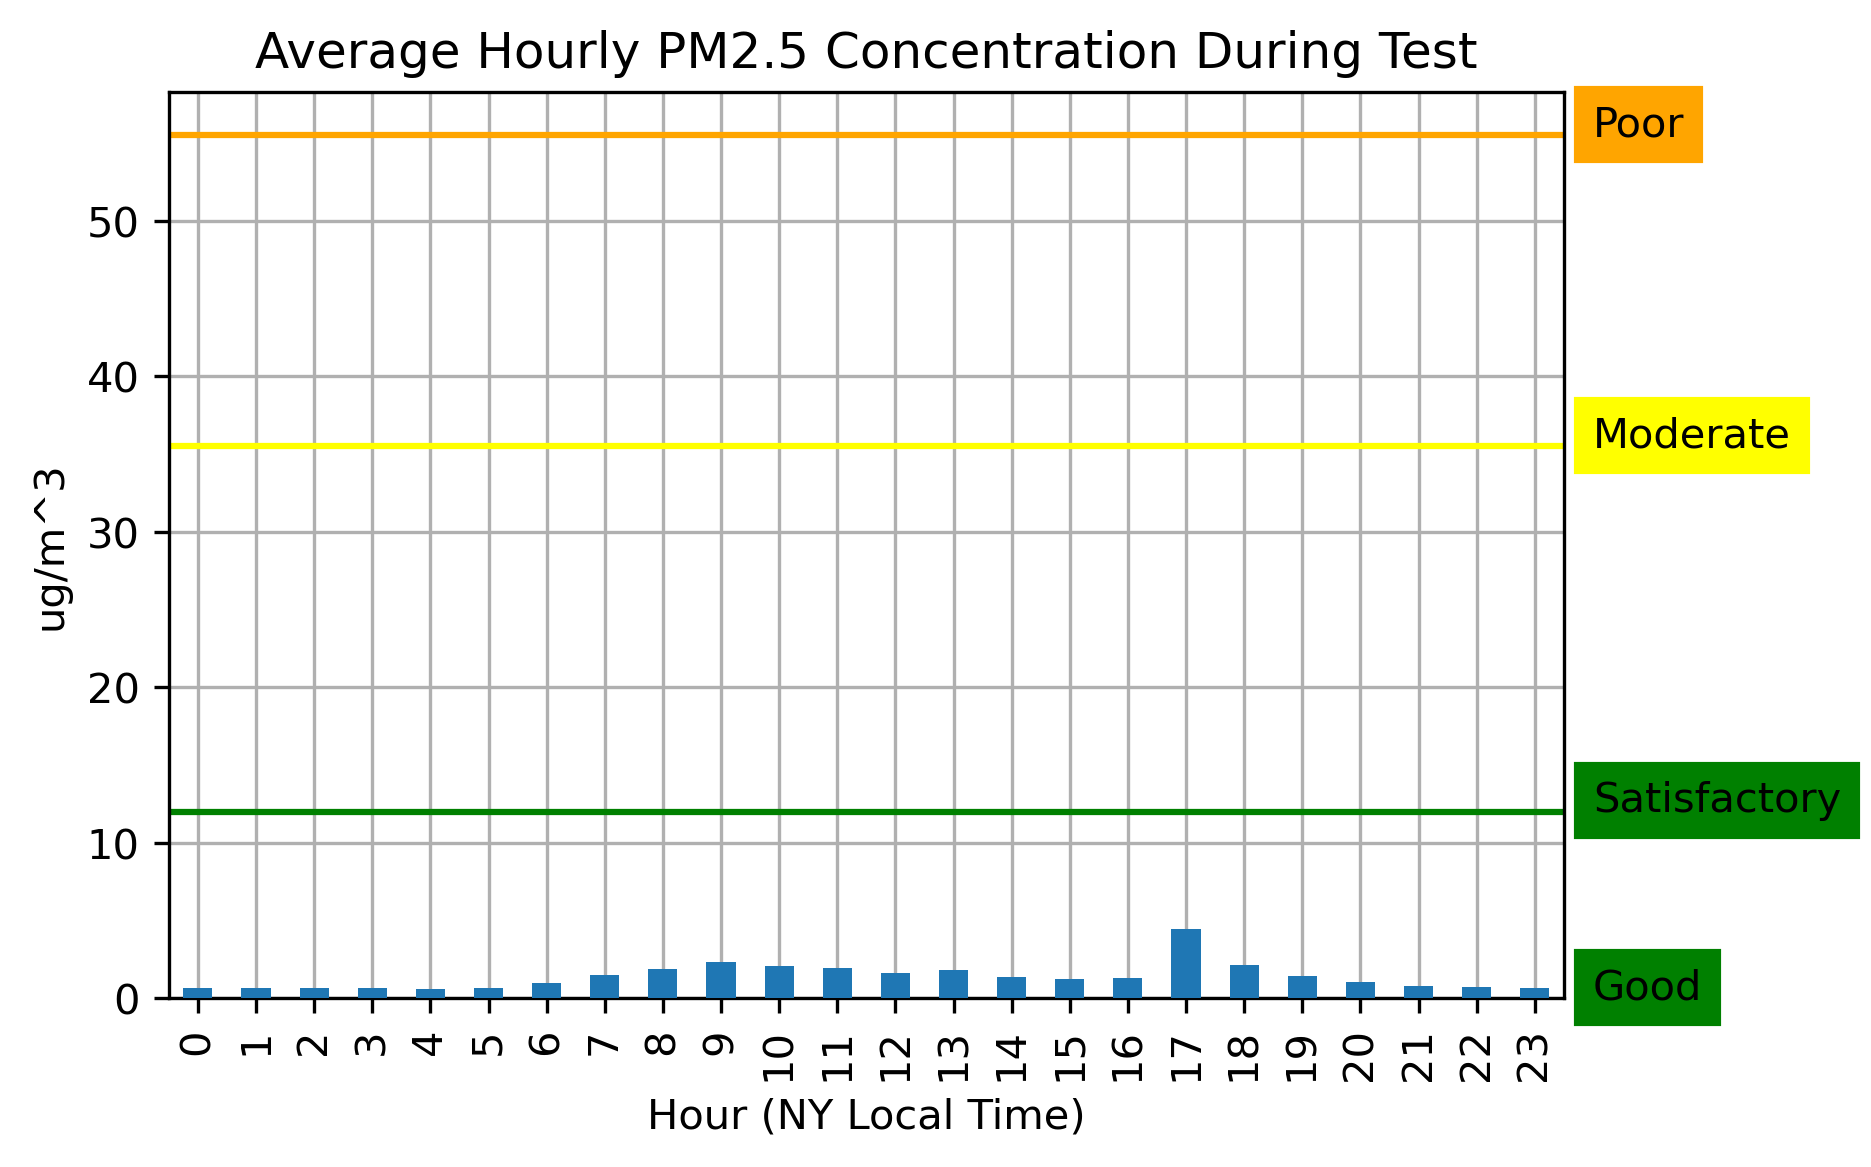

In [13]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.text(24,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(12, color="green")
plt.text(24,12,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(35.5, color="yellow")
plt.text(24,35.5,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(55.5, color="orange")
plt.text(24,55.5,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(150.5, color="red")
#plt.text(24,150.5,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Hourly PM2.5 Concentration During Test")
plt.grid()

### Daily PM2.5 Concentration with Threshold

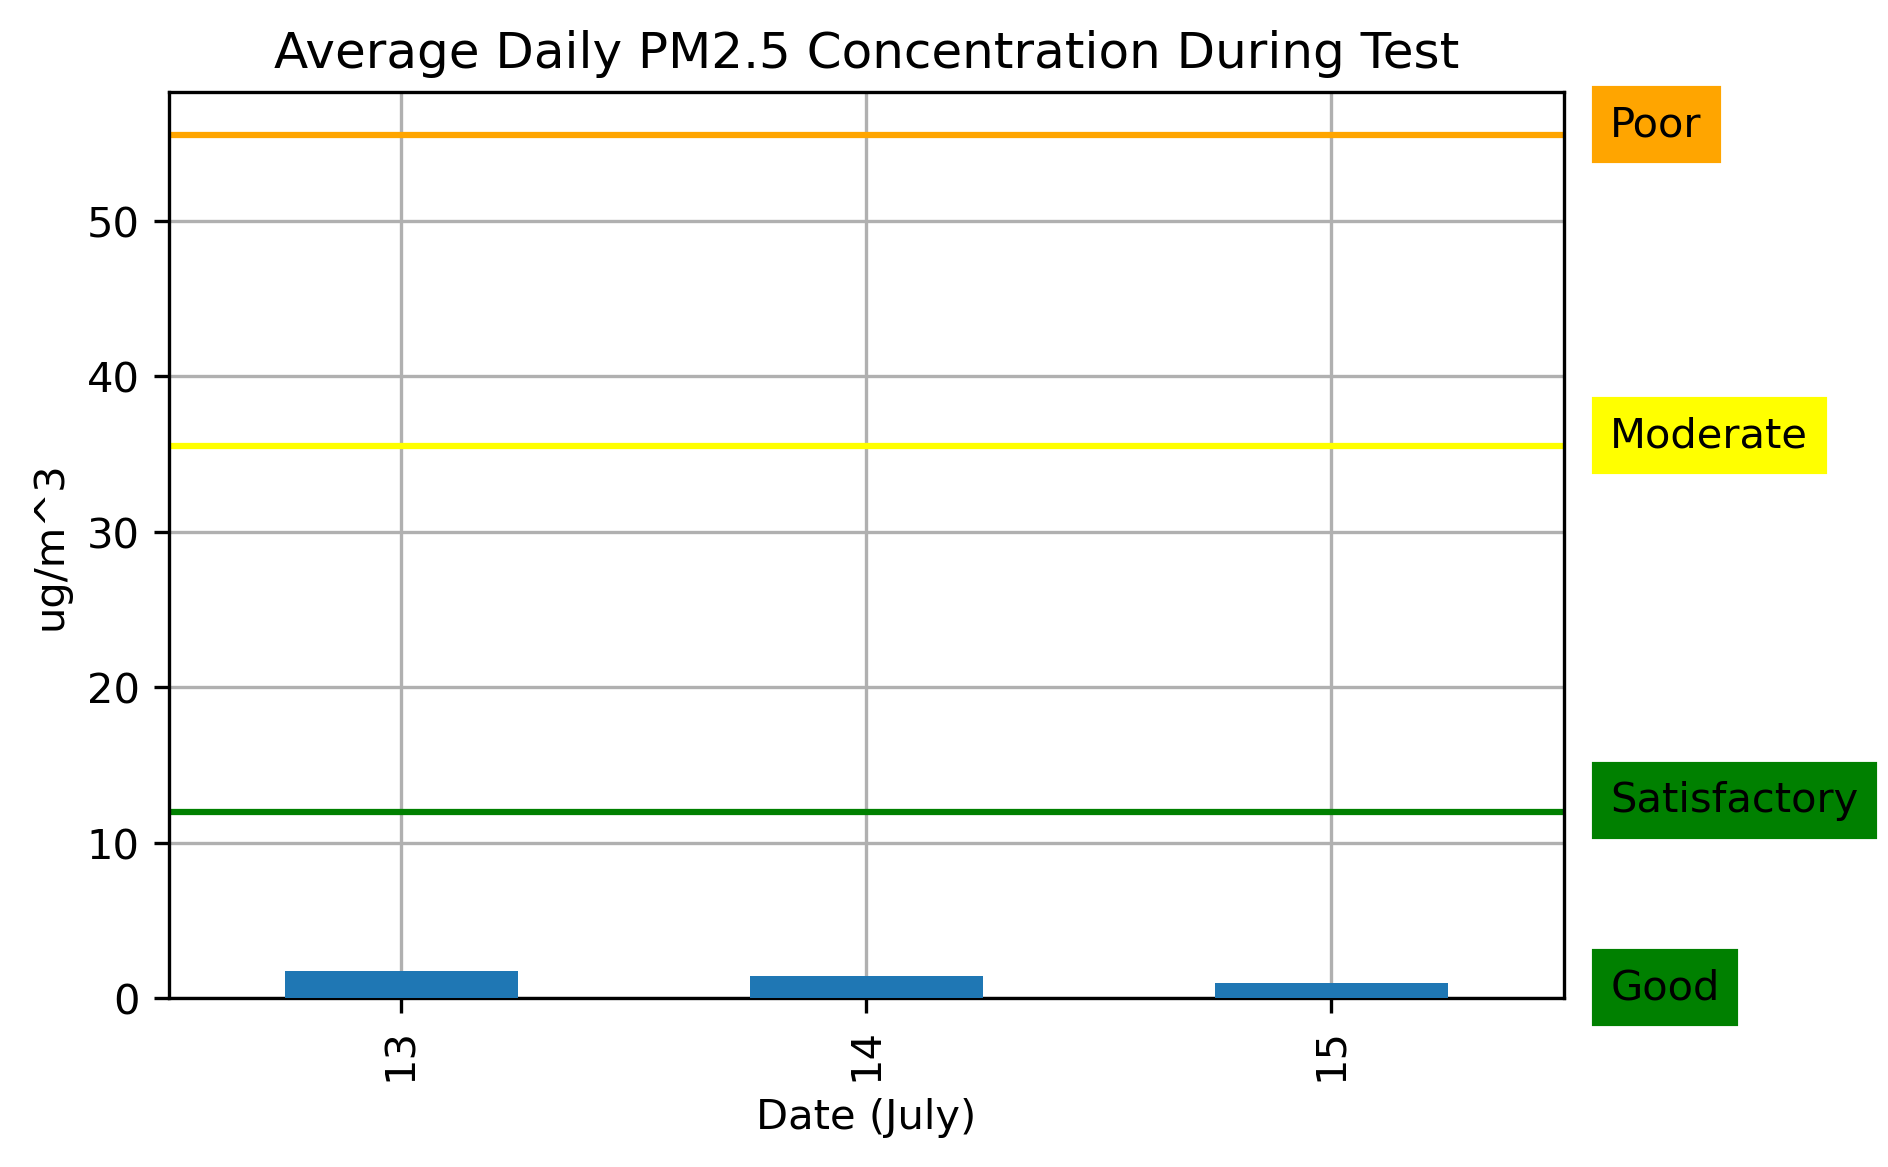

In [14]:
table.groupby(table["datetime"].dt.day)["PM2.5"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.text(2.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(12, color="green")
plt.text(2.6,12,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(35.5, color="yellow")
plt.text(2.6,35.5,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(55.5, color="orange")
plt.text(2.6,55.5,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(150.5, color="red")
#plt.text(2.6,150.5,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Daily PM2.5 Concentration During Test")
plt.grid()

### Hourly PM10 with Treshold

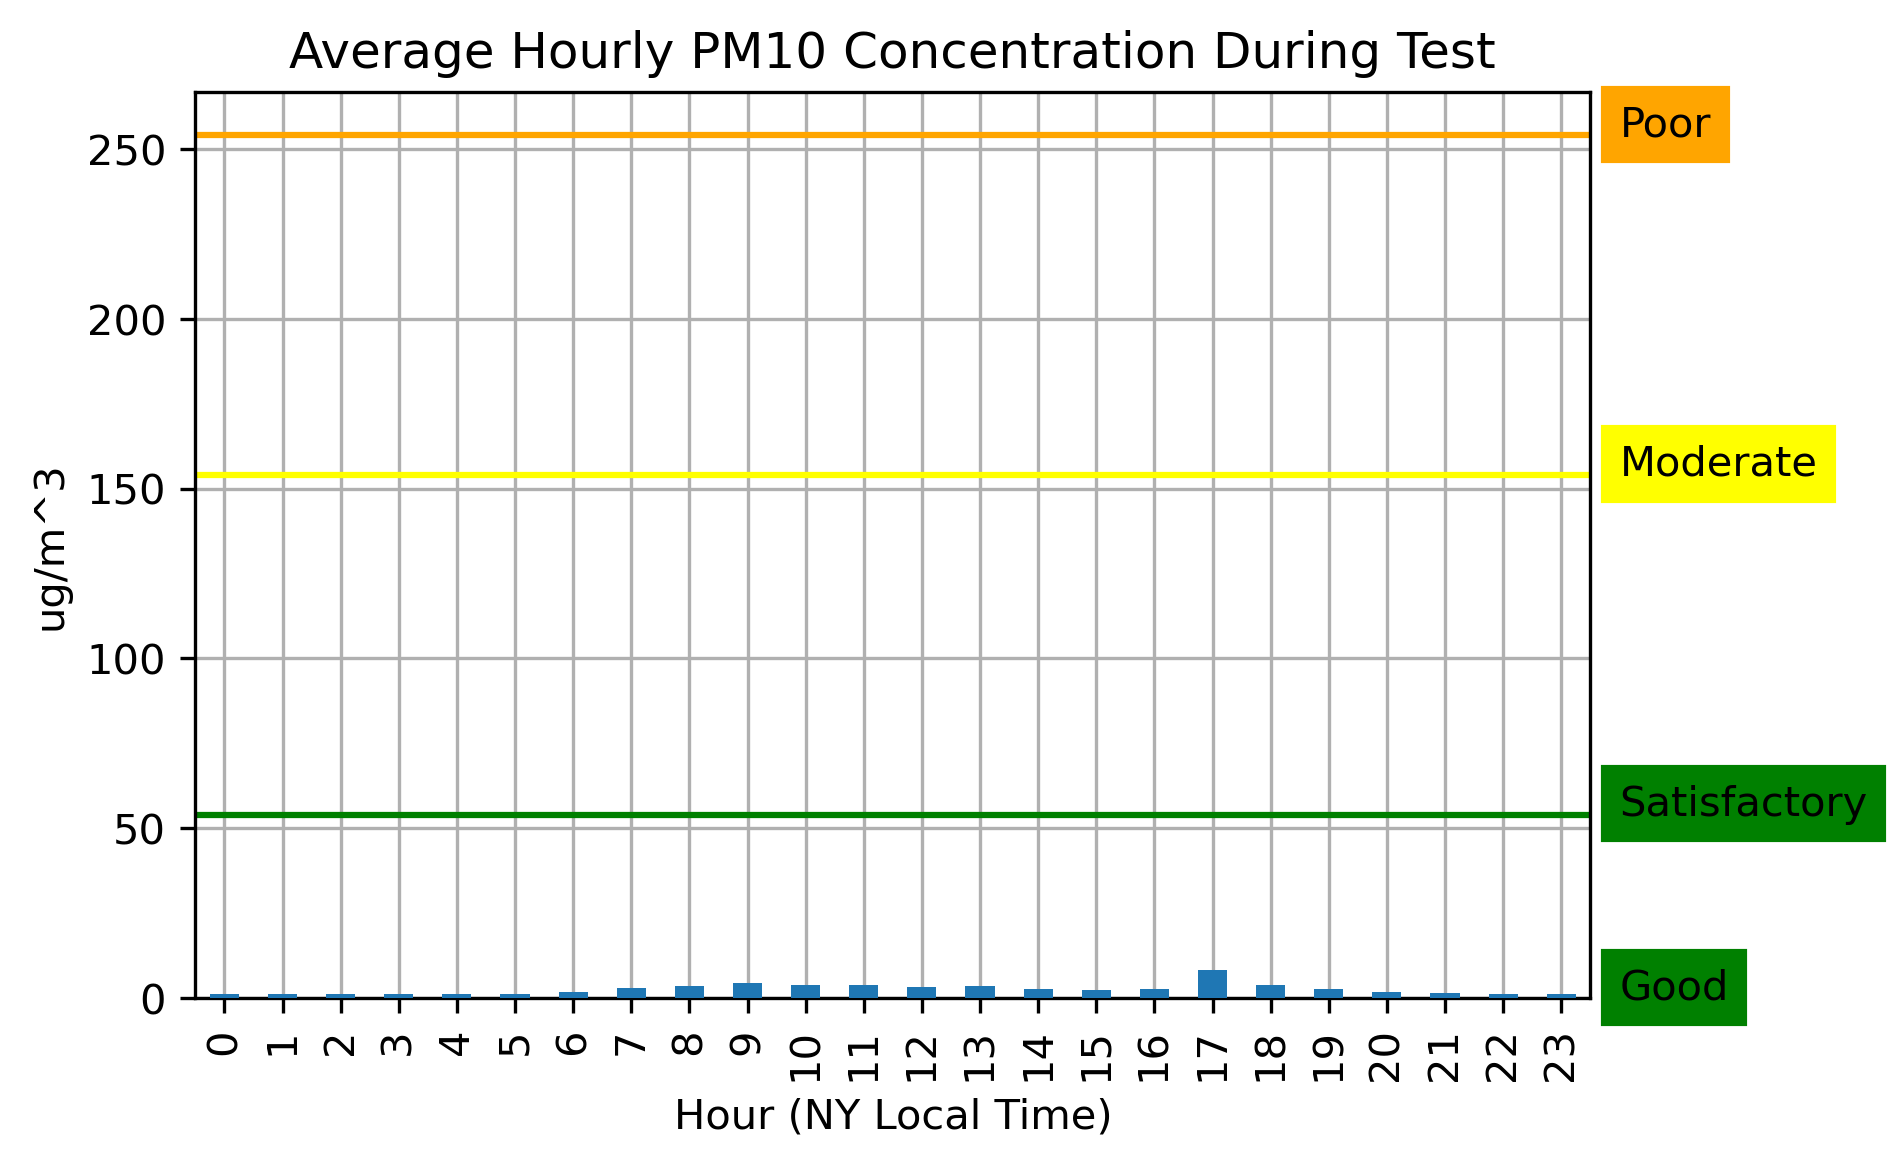

In [15]:
table.groupby(table["datetime"].dt.hour)["PM10"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.text(24,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(54, color="green")
plt.text(24,54,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(154, color="yellow")
plt.text(24,154,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(254, color="orange")
plt.text(24,254,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(354, color="red")
#plt.text(24,354,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Hourly PM10 Concentration During Test")
plt.grid()

### Daily PM10 with Treshold

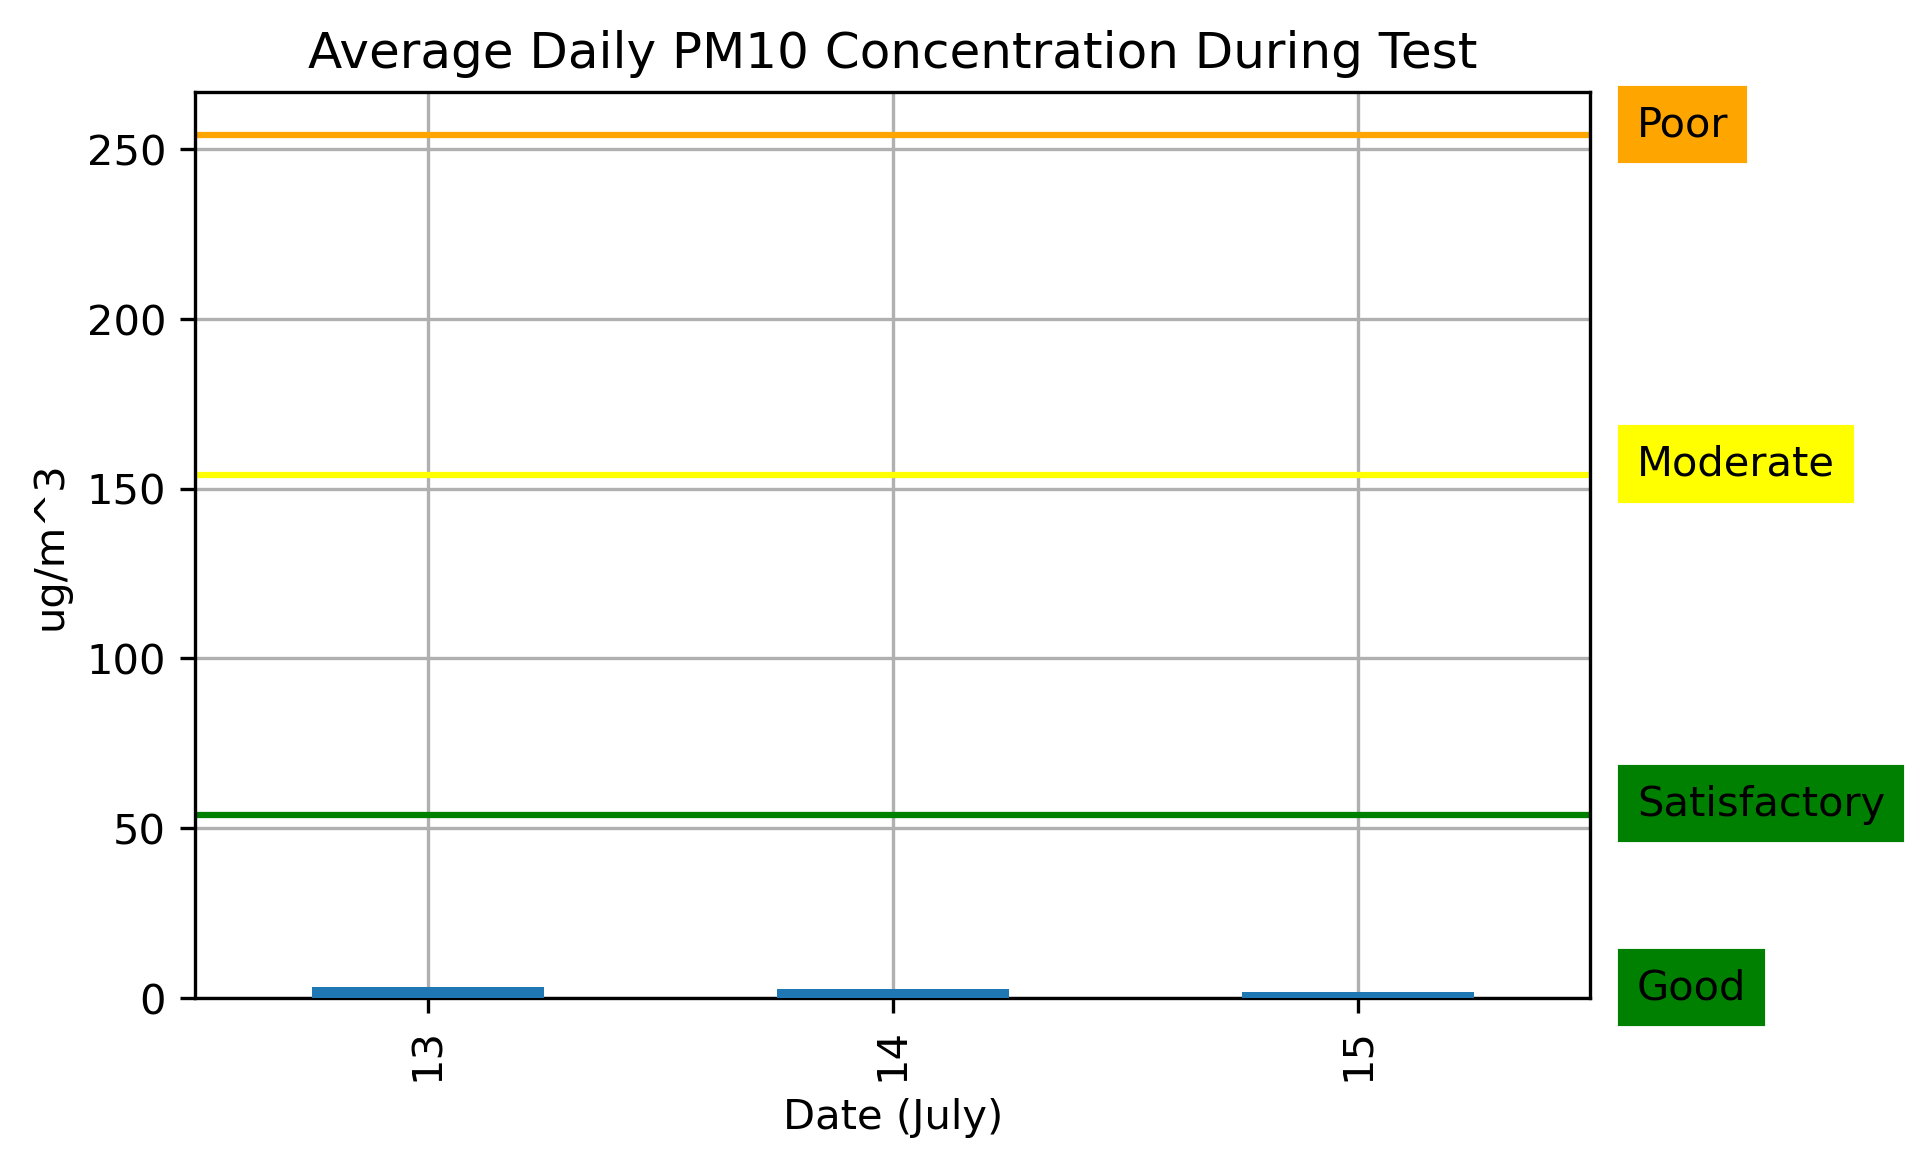

In [16]:
table.groupby(table["datetime"].dt.day)["PM10"].mean().plot(kind='bar', zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('ug/m^3')
plt.text(2.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(54, color="green")
plt.text(2.6,54,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(154, color="yellow")
plt.text(2.6,154,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(254, color="orange")
plt.text(2.6,254,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(354, color="red")
#plt.text(2.6,354,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average Daily PM10 Concentration During Test")
plt.grid()

## AQI Calculations <a class="anchor" id="Header-6"></a>

This section computes and graphs AQI for each day of the test (AQI is a daily measurement).

`[(AQIHi - AQILo)/(ConcHi - ConcLo)]*(ConcIn - ConcLo) + AQILo`

`ConcIn = Input concentration for a given pollutant
ConcLo = The concentration breakpoint that is less than or equal to Conci
ConcHi = The concentration breakpoint that is greater than or equal to Conci
AQILo = The AQI value/breakpoint corresponding to ConcLo
AQIHi = The AQI value/breakpoint corresponding to ConcHi`

### Calculate PM2.5 AQI

In [46]:
ConcIn = table.groupby(table["datetime"].dt.day)["PM2.5"].mean().reset_index()
AQ_Array = [''] * len(ConcIn["PM2.5"])

j = 0
for i in ConcIn["PM2.5"]:
    i = float(i)
    if i < 12.0:                                            # AQI = "Good"
        AQIHi = 50.0
        AQILo = 0.0
        ConcHi = 12.0
        ConcLo = 0.0
    elif (i >= 12.0 and i < 35.5):                          # AQI = "Satisfactory"
        AQIHi = 100.0
        AQILo = 51.0
        ConcHi = 35.5
        ConcLo = 12.0
    elif (i >= 35.5 and i < 55.5):                          # AQI = "Moderate"
        AQIHi = 150.0
        AQILo = 101.0
        ConcHi = 55.5
        ConcLo = 35.5
    elif (i >= 55.5 and i < 150.5):                         # AQI = "Poor"
        AQIHi = 200.0
        AQILo = 151.0
        ConcHi = 150.5
        ConcLo = 55.5
    elif (i >= 150.5 and i < 250.5):                        # AQI = "Very Poor"
        AQIHi = 300.0
        AQILo = 201.0
        ConcHi = 250.5
        ConcLo = 150.5
    elif i >= 250.5:                                        # AQI = "Severe"
        AQIHi = 500.0
        AQILo = 301.0
        ConcHi = 500.5
        ConcLo = 250.5

    AQLev = (AQIHi - AQILo)
    AQLev = (AQLev)/(ConcHi - ConcLo)
    AQLev = AQLev*(i - ConcLo)
    AQLev = AQLev + AQILo
    AQLev = round(AQLev)
    AQ_Array[j] = AQLev
    j = j + 1

### Plot PM2.5 AQI

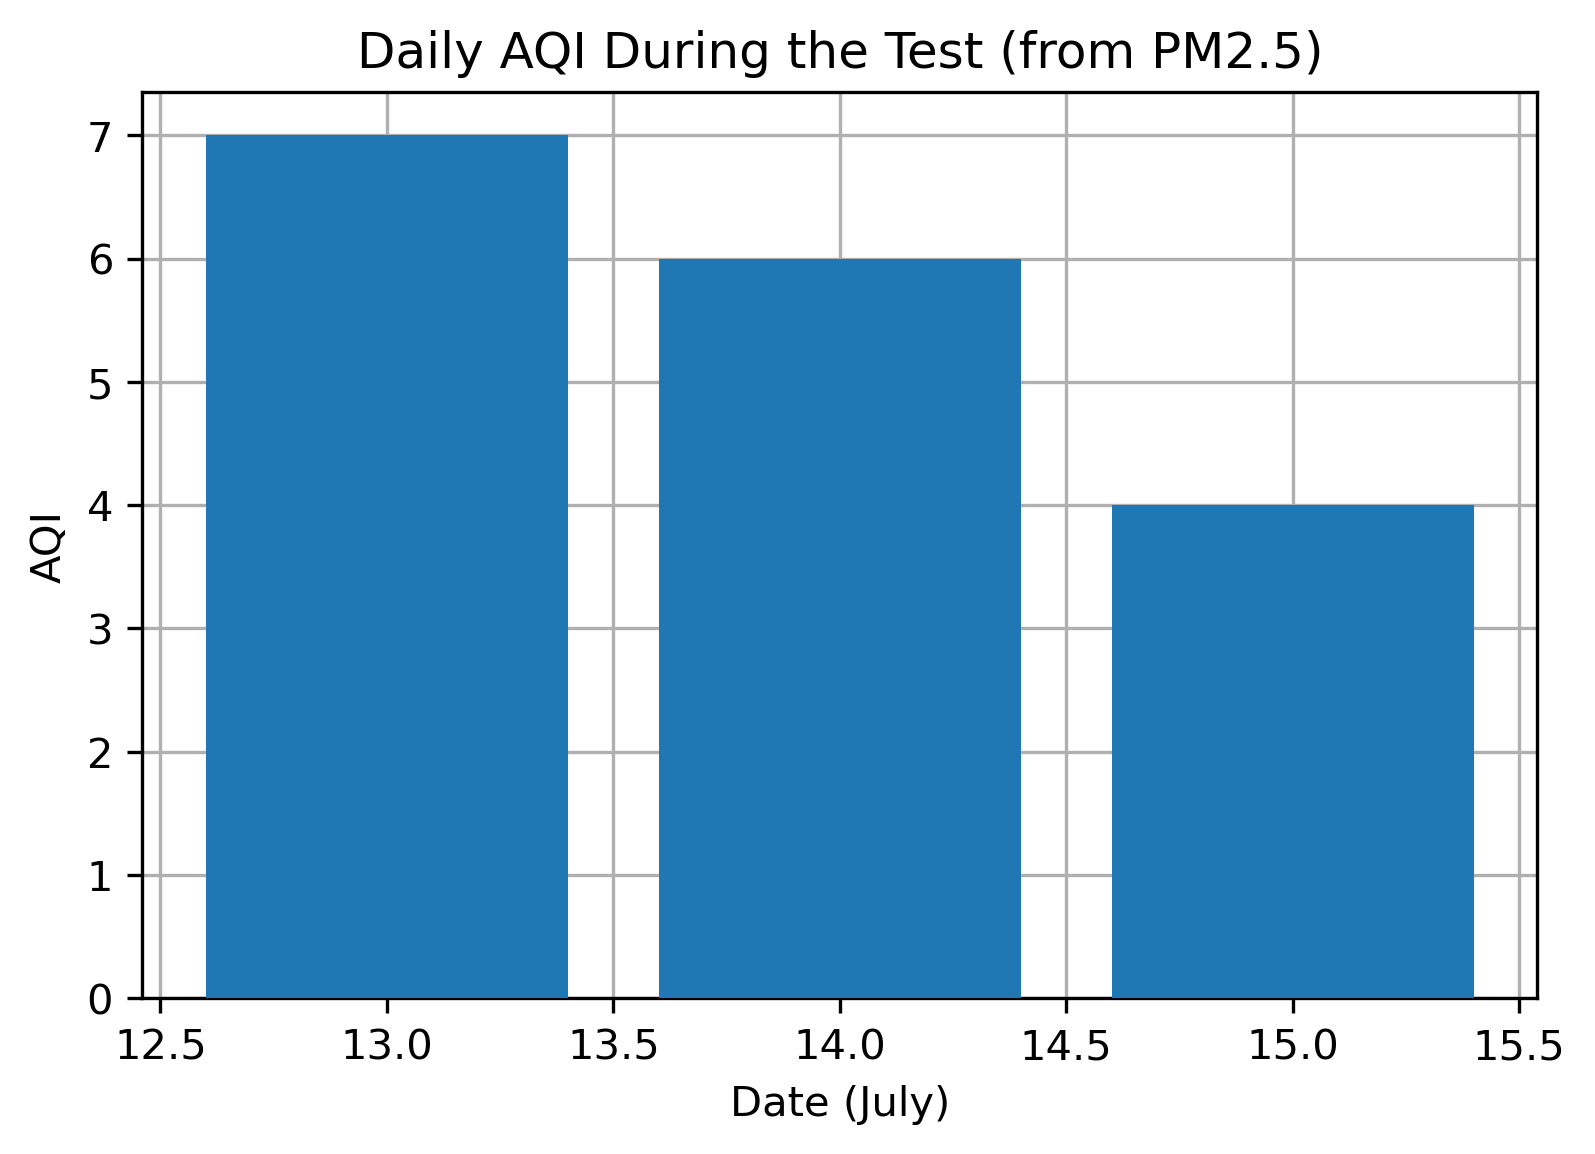

In [50]:
plt.bar(ConcIn["datetime"],AQ_Array, zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.title("Daily AQI During the Test (from PM2.5)")
plt.grid()

### Plot PM2.5 AQI with Treshold Lines

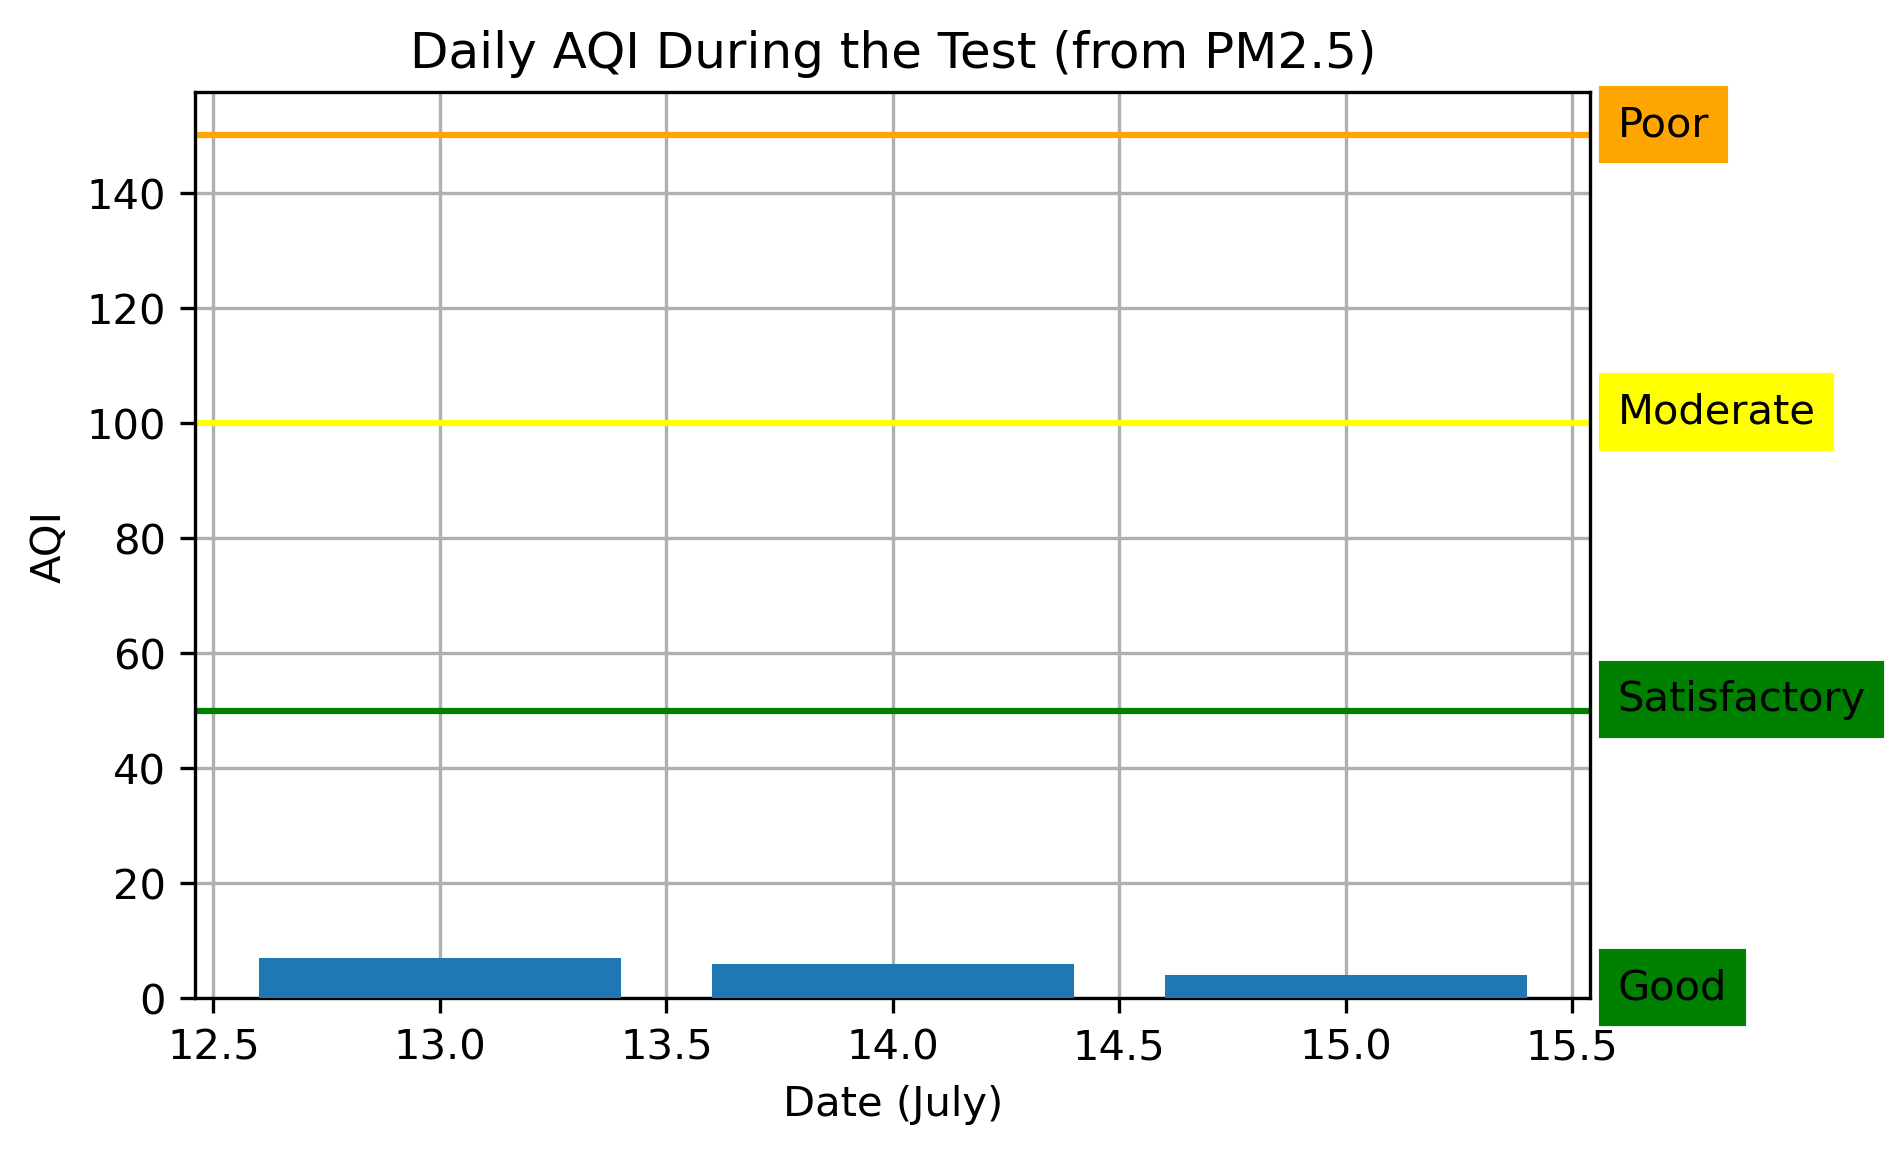

In [33]:
plt.bar(ConcIn["datetime"],AQ_Array, zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.text(15.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(50, color="green")
plt.text(15.6,50,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(100, color="yellow")
plt.text(15.6,100,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(150, color="orange")
plt.text(15.6,150,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(200, color="red")
#plt.text(15.6,200,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Daily AQI During the Test (from PM2.5)")
plt.grid()

### Calculate PM10 AQI

In [34]:
ConcIn = table.groupby(table["datetime"].dt.day)["PM10"].mean().reset_index()
AQ_Array = [''] * len(ConcIn["PM10"])

j = 0
for i in ConcIn["PM10"]:
    i = float(i)
    if i < 54.0:                                                 # AQI = "Good"
        AQIHi = 50.0
        AQILo = 0.0
        ConcHi = 54.0
        ConcLo = 0.0
    elif (i >= 54.0 and i < 154.0):                              # AQI = "Satisfactory"
        AQIHi = 100.0
        AQILo = 51.0
        ConcHi = 154.0
        ConcLo = 54.0
    elif (i >= 154.0 and i < 254.0):                             # AQI = "Moderate"
        AQIHi = 150.0
        AQILo = 101.0
        ConcHi = 254.0
        ConcLo = 154.0
    elif (i >= 254.0 and i < 354.0):                             # AQI = "Poor"
        AQIHi = 200.0
        AQILo = 151.0
        ConcHi = 354.0
        ConcLo = 254.0
    elif (i >= 354.0 and i < 424.0):                             # AQI = "Very Poor"
        AQIHi = 300.0
        AQILo = 201.0
        ConcHi = 424.0
        ConcLo = 354.0
    elif i >= 424.0:                                             # AQI = "Severe"
        AQIHi = 500.0
        AQILo = 301.0
        ConcHi = 604.0
        ConcLo = 424.0

    AQLev = (AQIHi - AQILo)
    AQLev = (AQLev)/(ConcHi - ConcLo)
    AQLev = AQLev*(i - ConcLo)
    AQLev = AQLev + AQILo
    AQLev = round(AQLev)
    AQ_Array[j] = AQLev
    j = j + 1

### Plot PM10 AQI

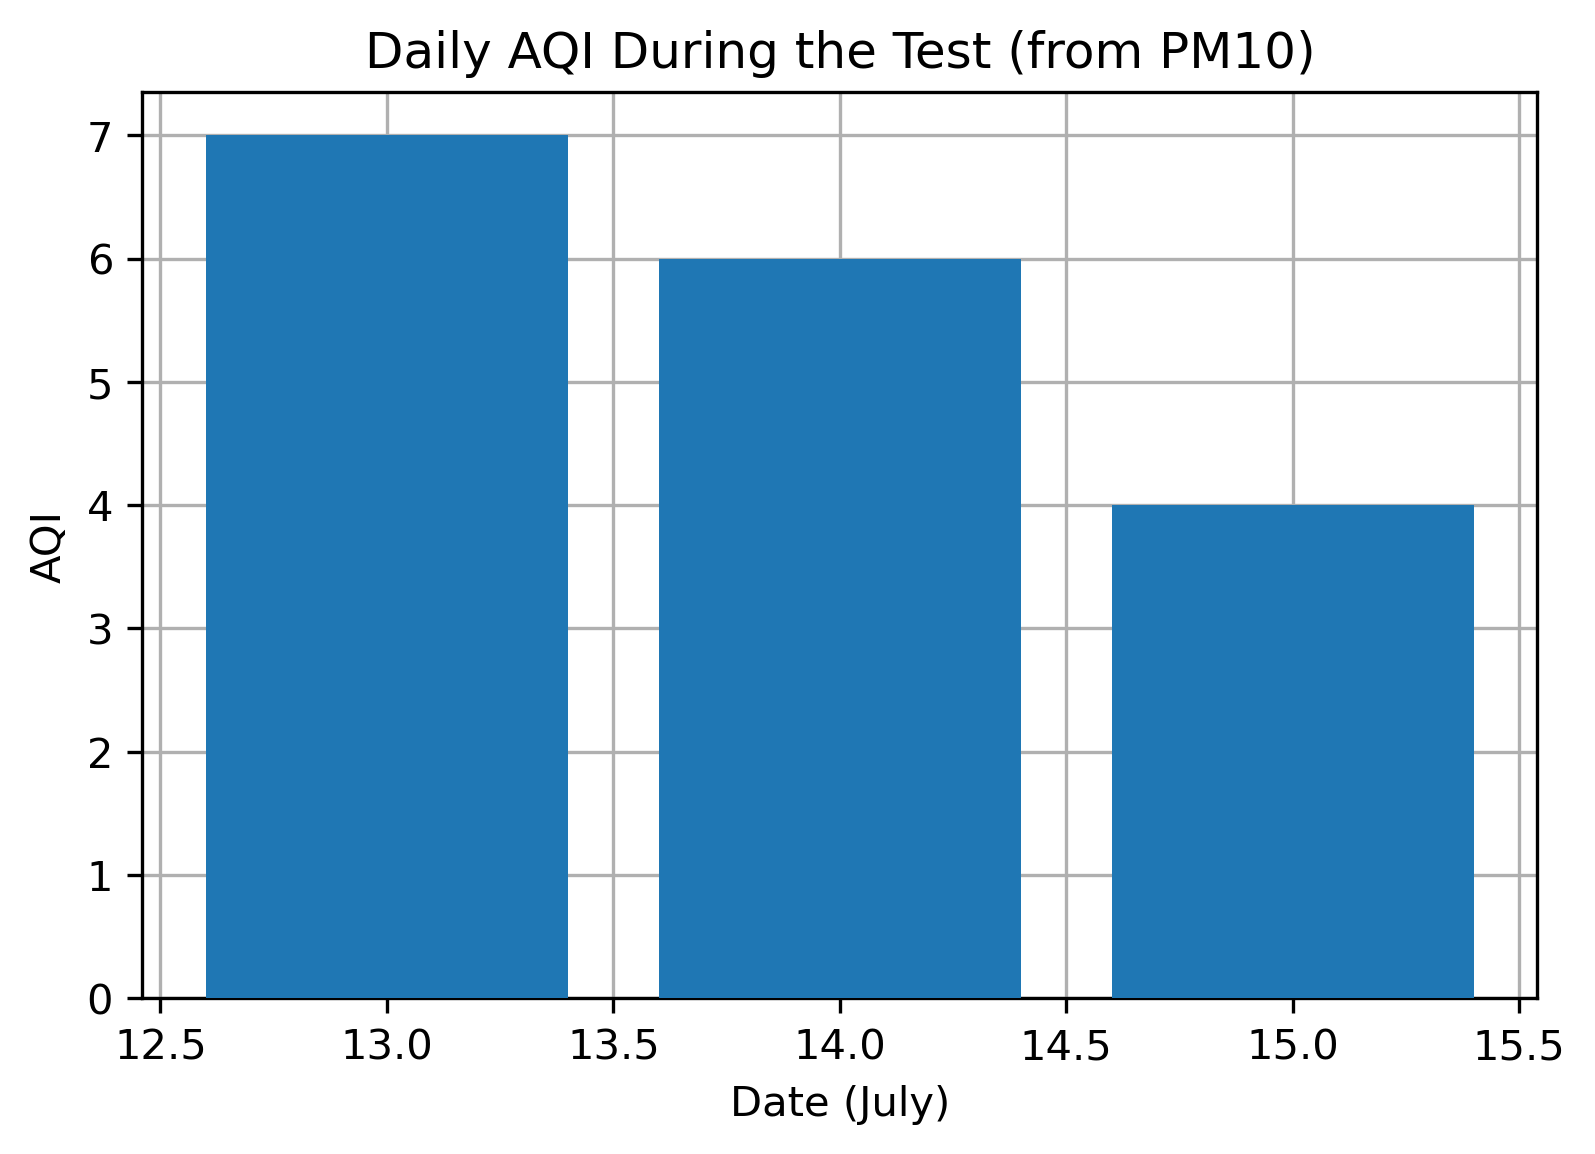

In [59]:
ConcIn["datetime"].astype(int)
plt.bar(ConcIn["datetime"],AQ_Array, zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.title("Daily AQI During the Test (from PM10)")
plt.grid()

### Plot PM10 AQI with Treshold Lines

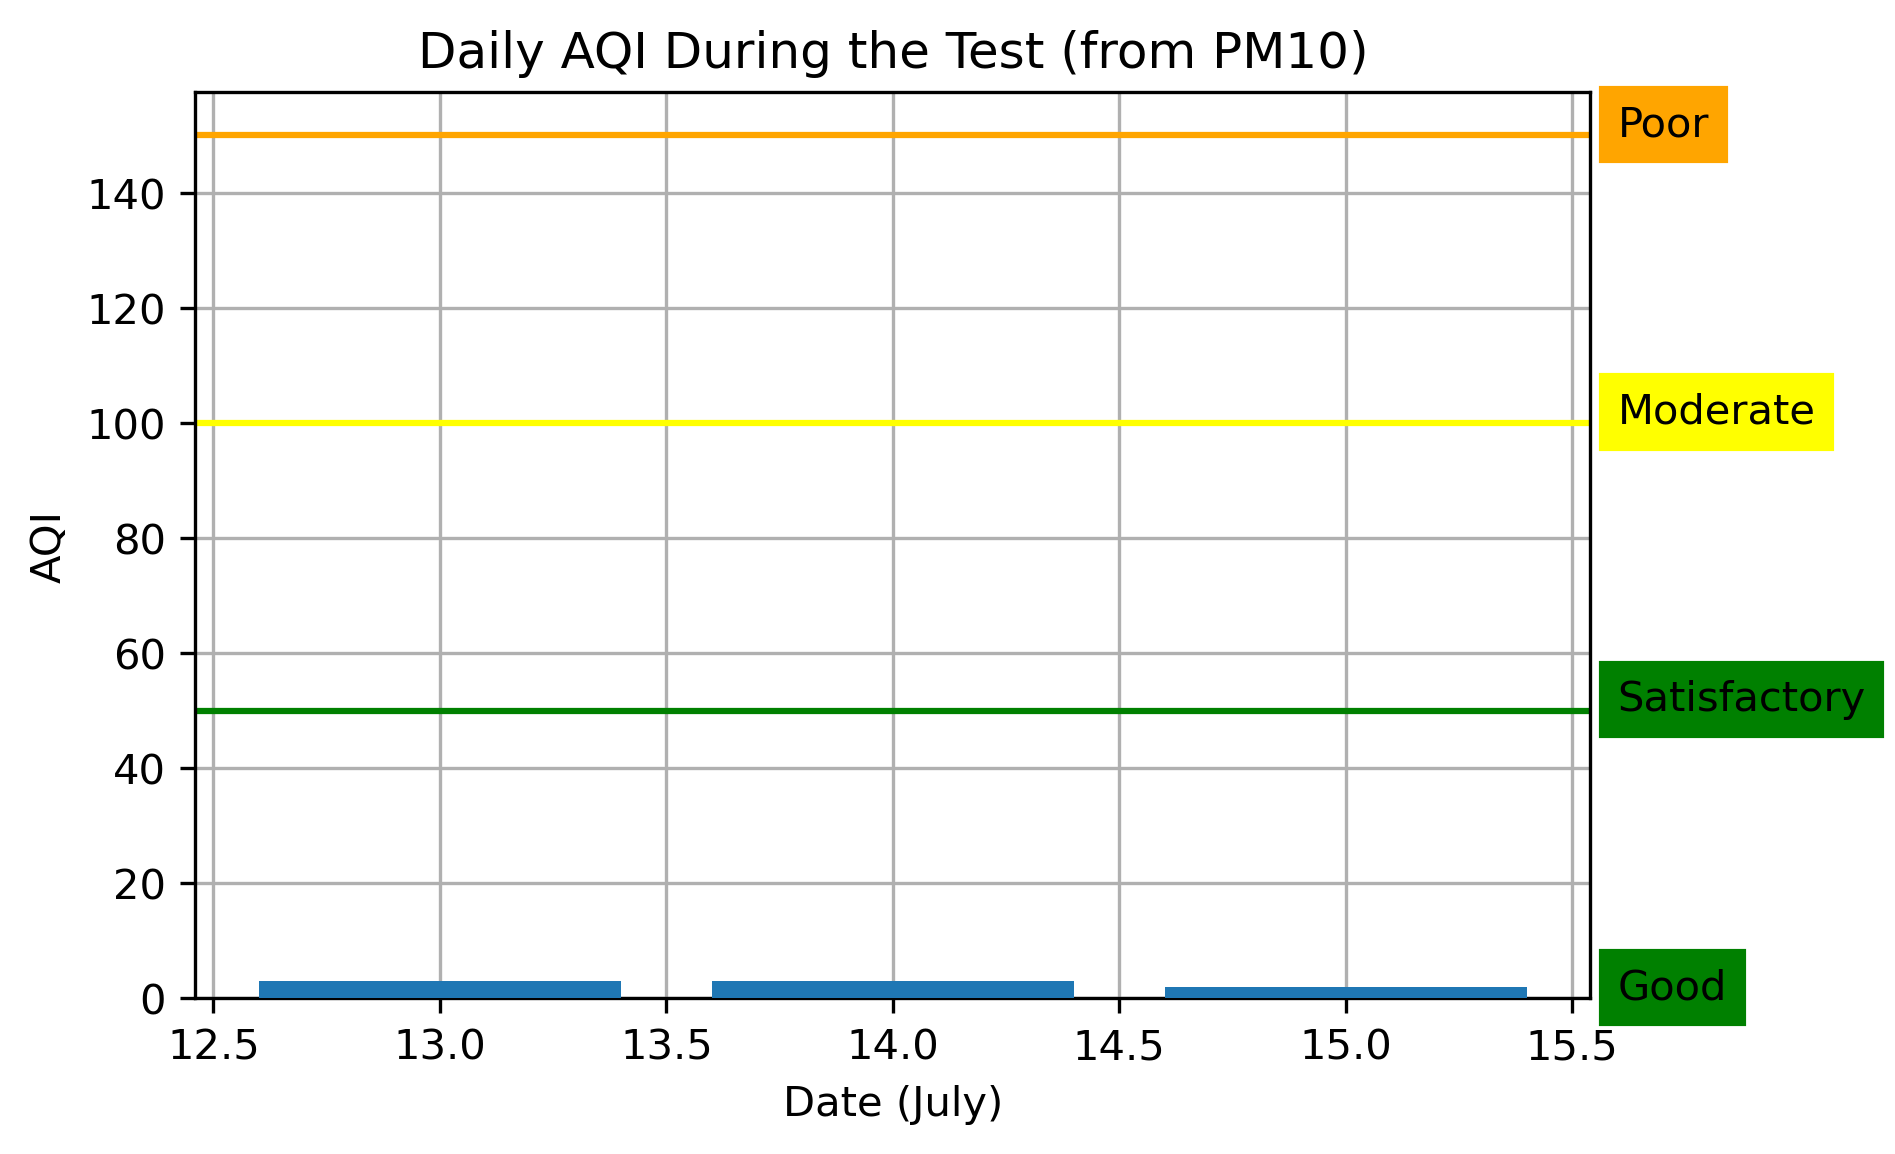

In [36]:
plt.bar(ConcIn["datetime"],AQ_Array, zorder=3)
plt.xlabel('Date (July)')
plt.ylabel('AQI')
plt.text(15.6,0,"Good",backgroundcolor="green",horizontalalignment="left")
plt.axhline(50, color="green")
plt.text(15.6,50,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(100, color="yellow")
plt.text(15.6,100,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
plt.axhline(150, color="orange")
plt.text(15.6,150,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(200, color="red")
#plt.text(15.6,200,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Daily AQI During the Test (from PM10)")
plt.grid()

## Observations <a class="anchor" id="Header-7"></a>

We observed that we can successfully utilze Jupyter Notebooks to plot a variety of useful data from a longitudinal AQ dataset.

AQI can be calculated from daily averages, and can be plotted with treshold lines based on data from the literature. 

Rolling averages of various sizes can also be computed and provide more legible data than simply graphing the dataset itself vs. time.

The air quality throughout this test in the kitchen environment was well within acceptable levels. The residents of this area have no current cause for concern.